Hoàng Thị Thanh Phương - K204061445;
Nguyễn Thị Huyền Thương - K204061450;
Nguyễn Trần Thúy Quỳnh - K204060307;
Nguyễn Hoàng Tính - K204061451

## Import libraries

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns


# Statistics
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bankData = pd.read_csv('/content/drive/MyDrive/HK7/Python/Churn_Modelling.csv')

In [ ]:
bankData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Parameters and Variables

In [ ]:
font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#3b3689', '#e57438']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

random_state = 42
scoring_metric = 'recall'
comparison_dict, comparison_test_dict = {}, {}


# Understand data patterns

## Data overview

### Unique Values


In [ ]:
bankData.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
bankData.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
bankData.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
for col in bankData.columns:
    unique_values = bankData[col].unique()
    print("Unique values in column", col, ":", unique_values)

Unique values in column CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 

### Missing Data & Duplicated Data


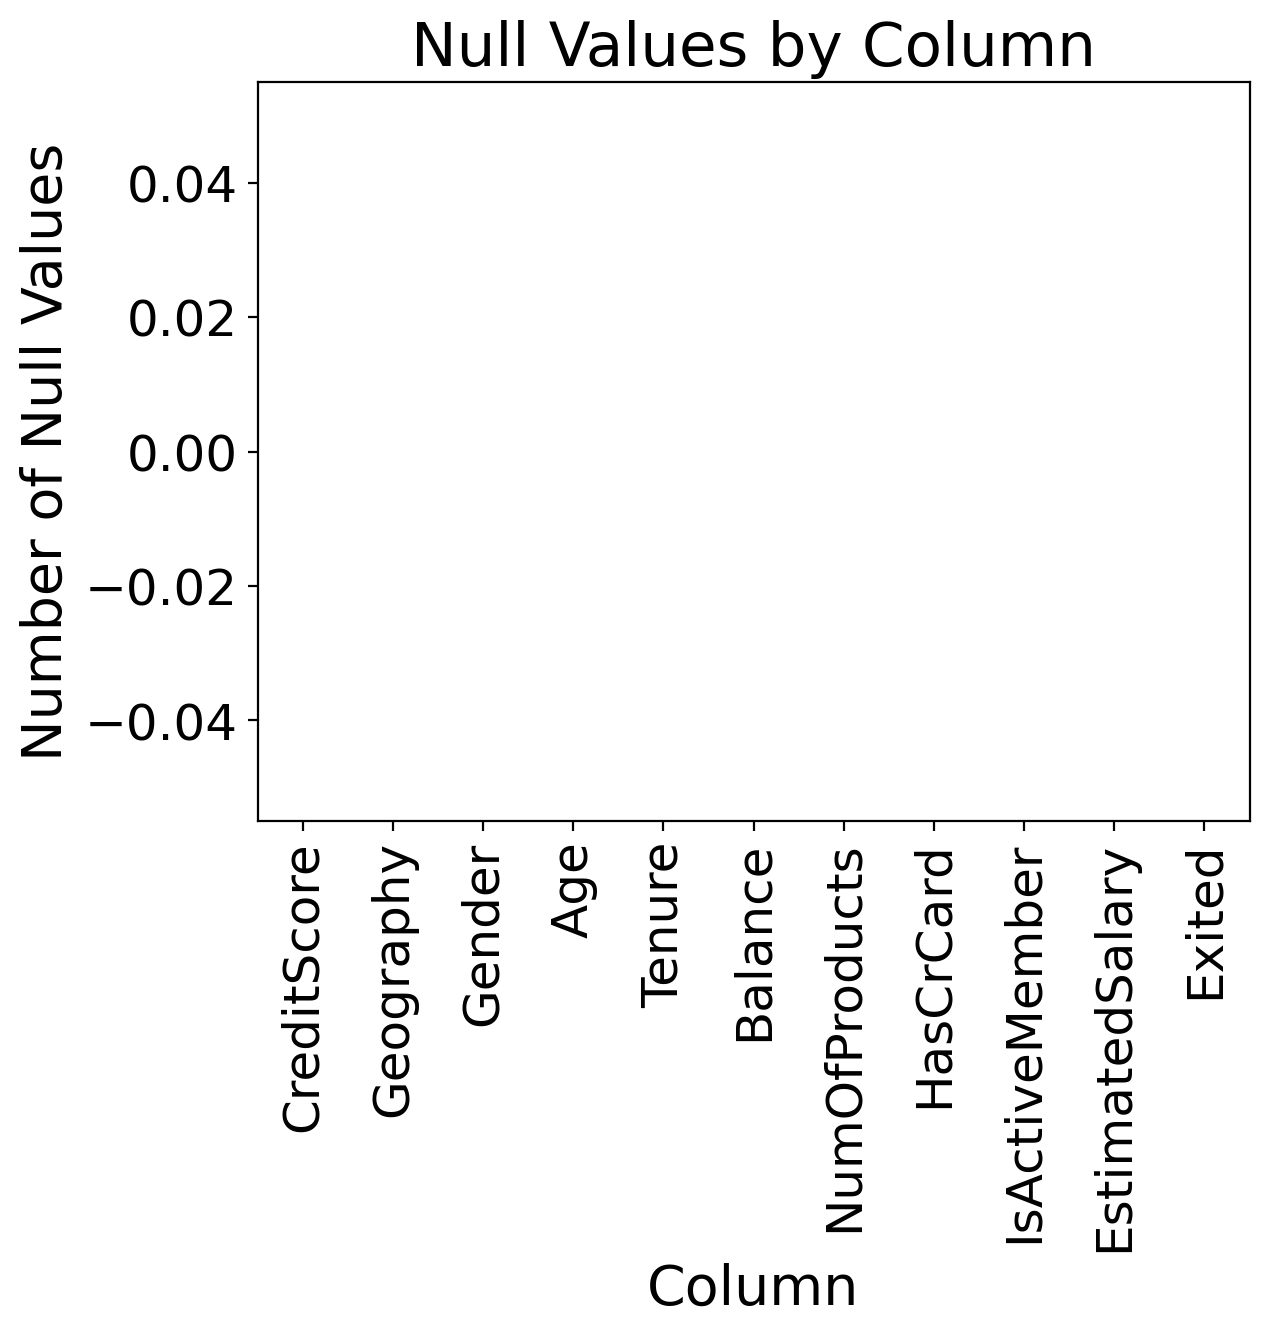

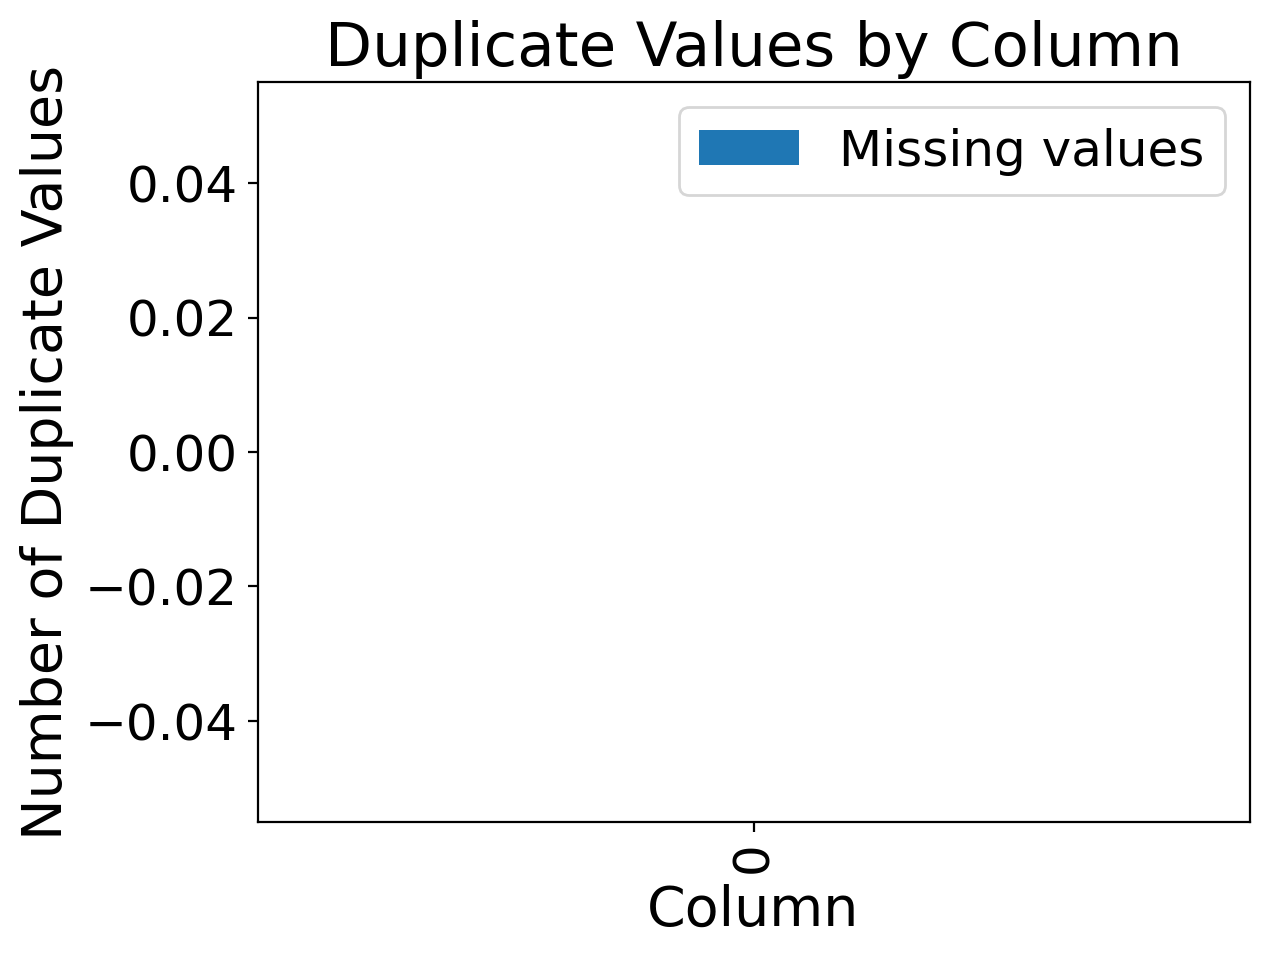

In [ ]:
nulls_by_column = bankData.isnull().sum()
nulls_by_column.plot(kind='bar')

plt.title('Null Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')

plt.show()

missing_by_column = bankData.duplicated().sum()
missing_data = {'Missing values': missing_by_column}
missing_df = pd.DataFrame(missing_data, index=[0])  # Thêm chỉ mục index=[0]
missing_df.plot(kind='bar')

plt.title('Duplicate Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Duplicate Values')

plt.show()


### Bảng Mean, Mod, Phân vị

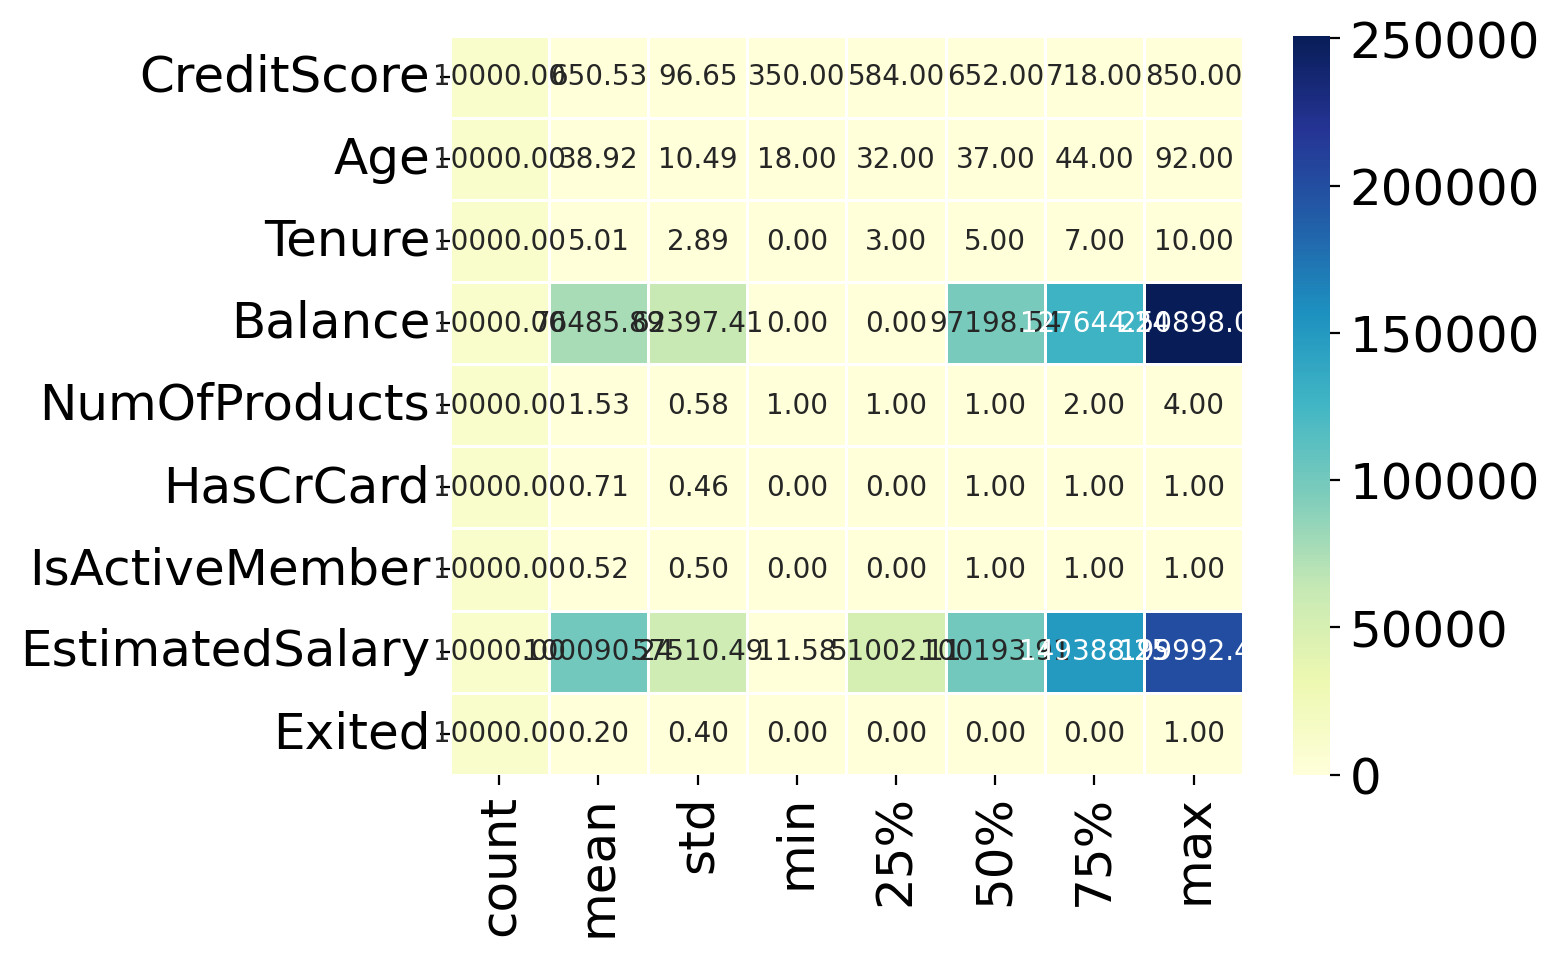

In [ ]:
df_desc = bankData.describe().T
sns.heatmap(df_desc, annot=True, fmt=".2f",
             linewidths=1,
             linecolor="white",
             cmap="YlGnBu")
plt.show()

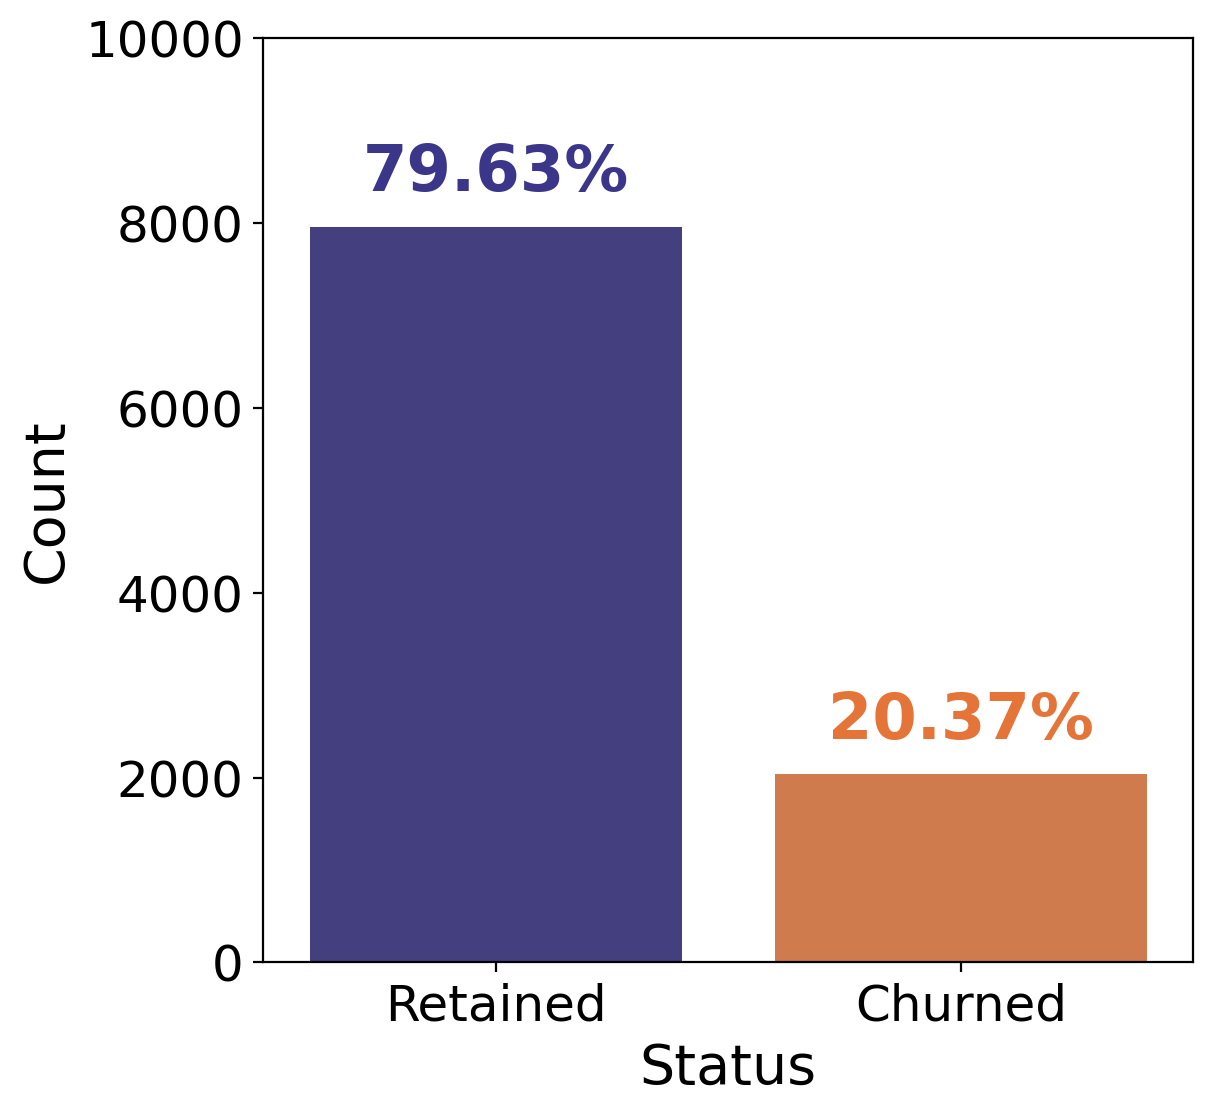

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Exited', data=bankData, palette=colors, ax=ax)

for index, value in enumerate(bankData['Exited'].value_counts()):
    label = '{}%'.format(round((value / bankData['Exited'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='bottom',
                color=colors[index],
                fontweight='bold',
                size=font_size + 3)
ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_ylim([0, 10000]);

In [ ]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


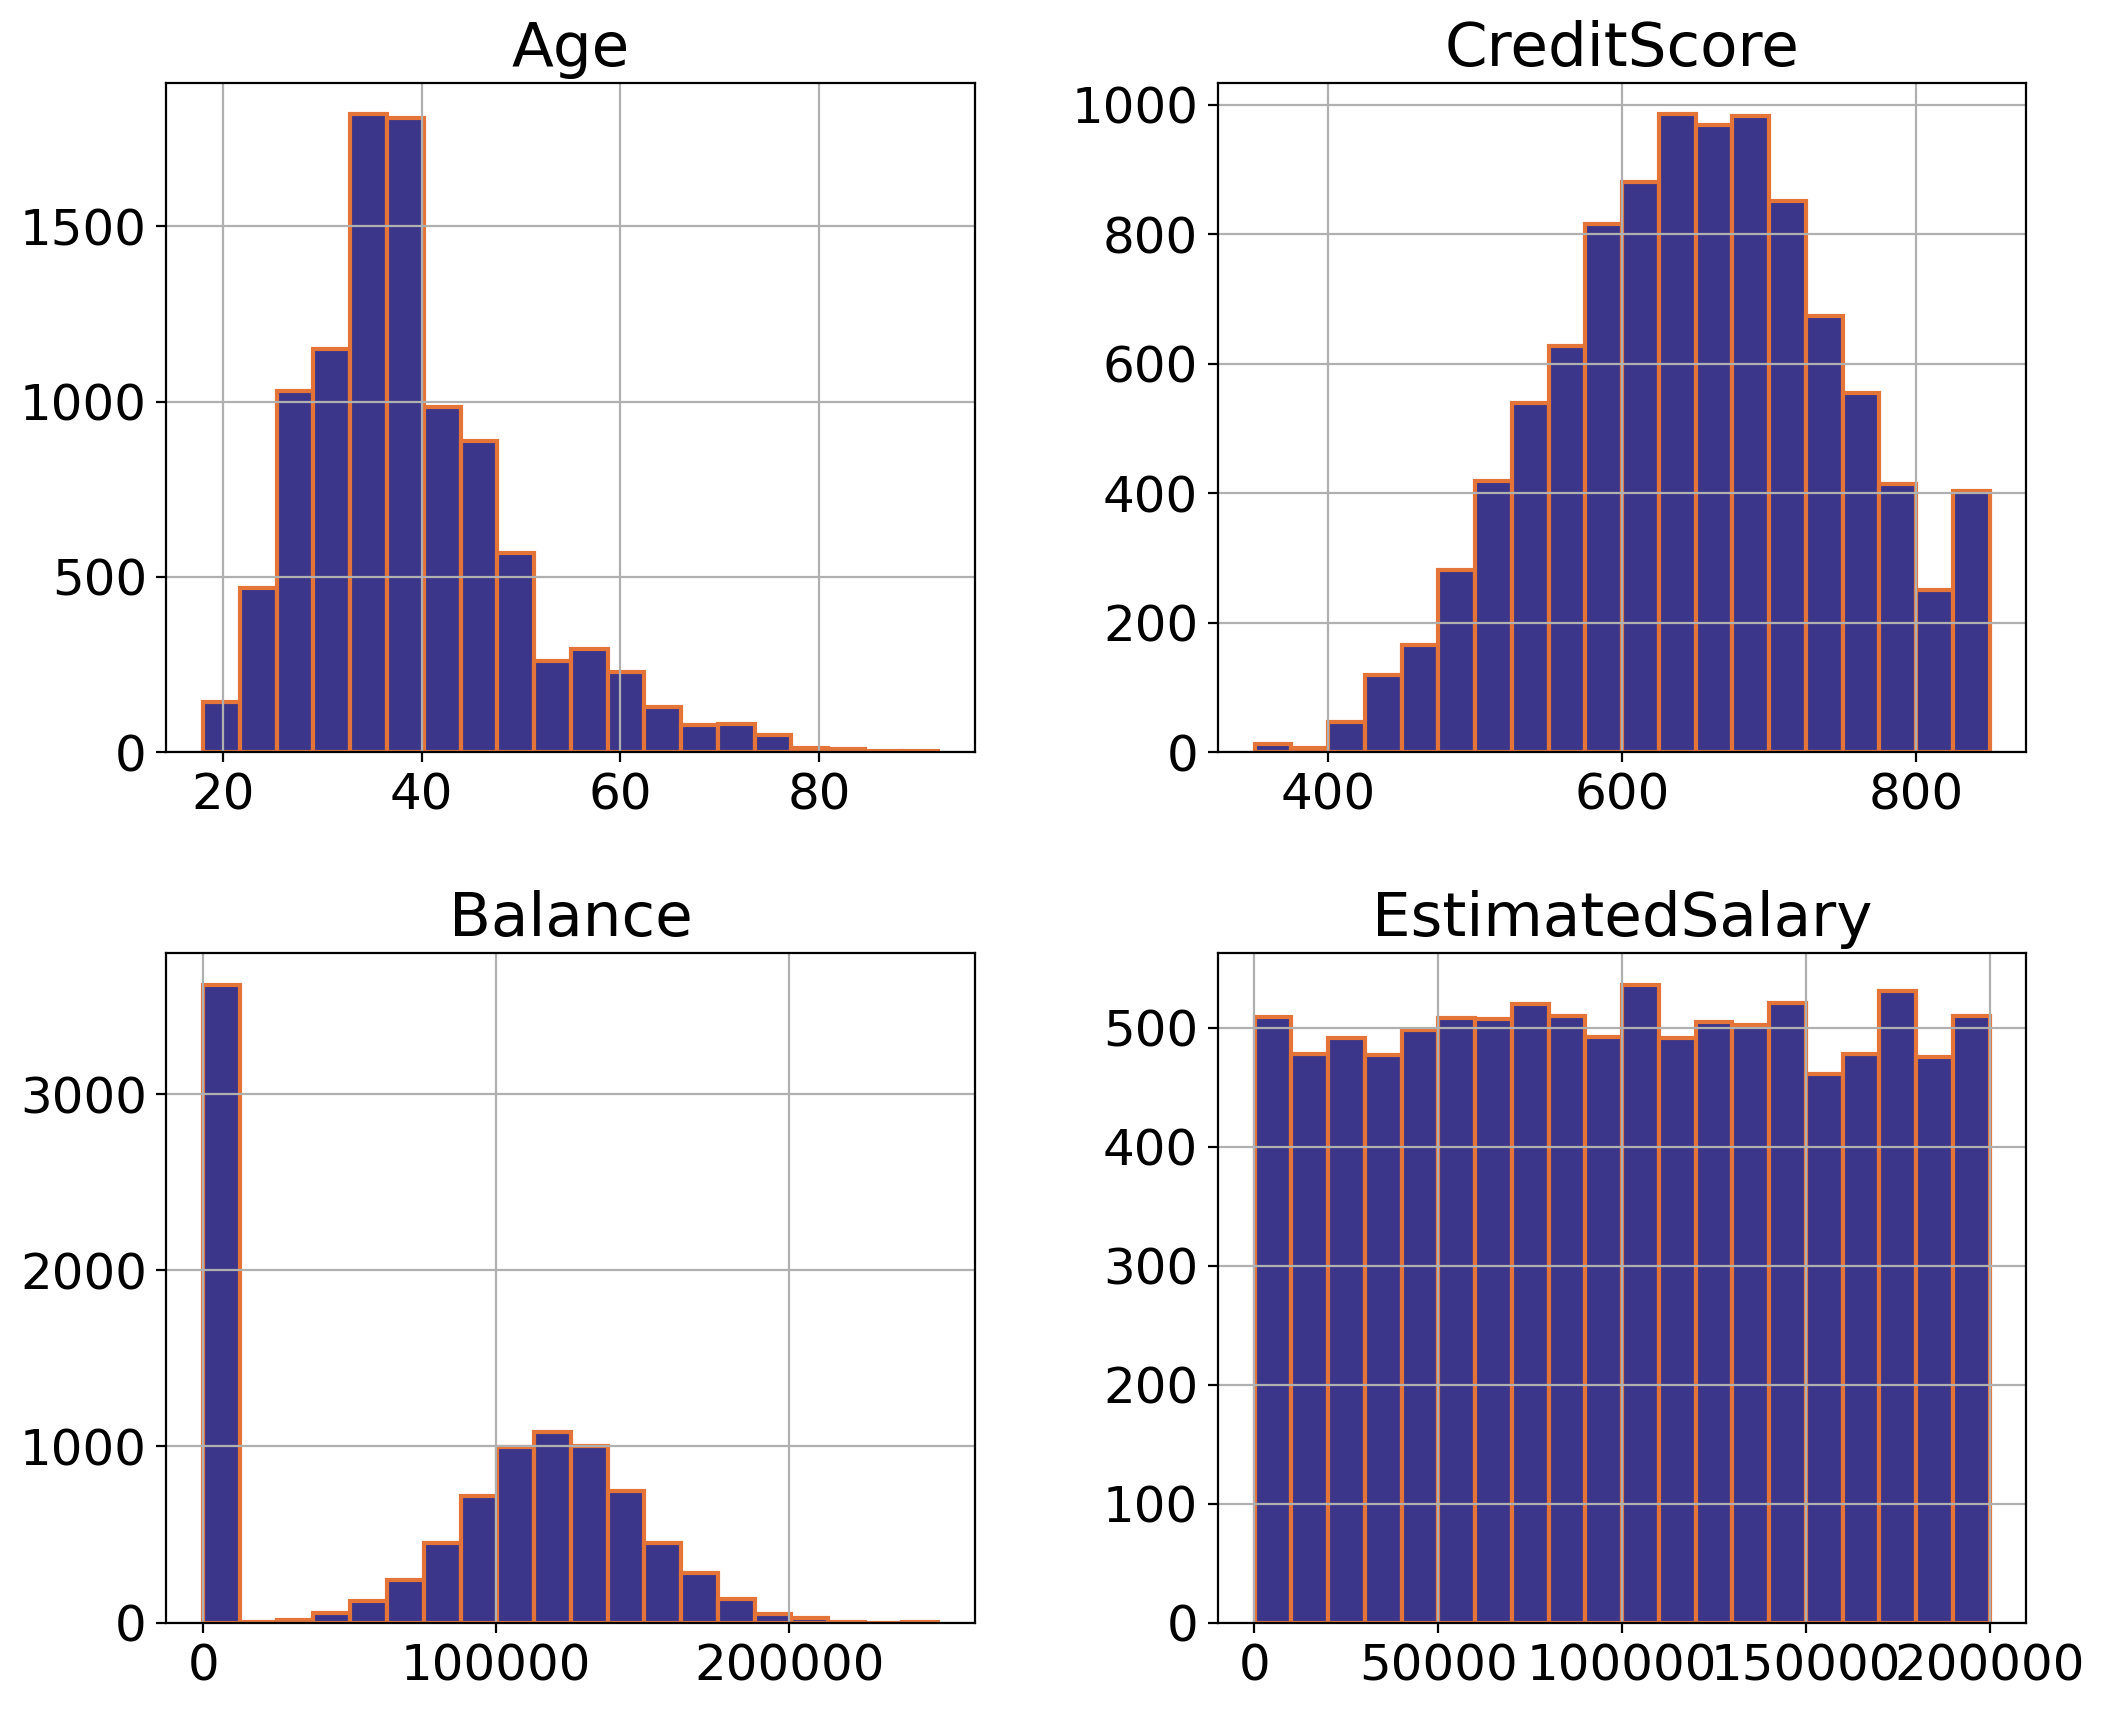

In [ ]:
bankData[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='#3b3689',
                          edgecolor='#e57438',
                          linewidth=1.5);
# num_bins = 4
# bin_centers = 0.5*(bins[1:]+bins[:-1])
# for x,y in zip(bin_centers,n):
#     plt.text(x, y, round(x,1), ha='center')


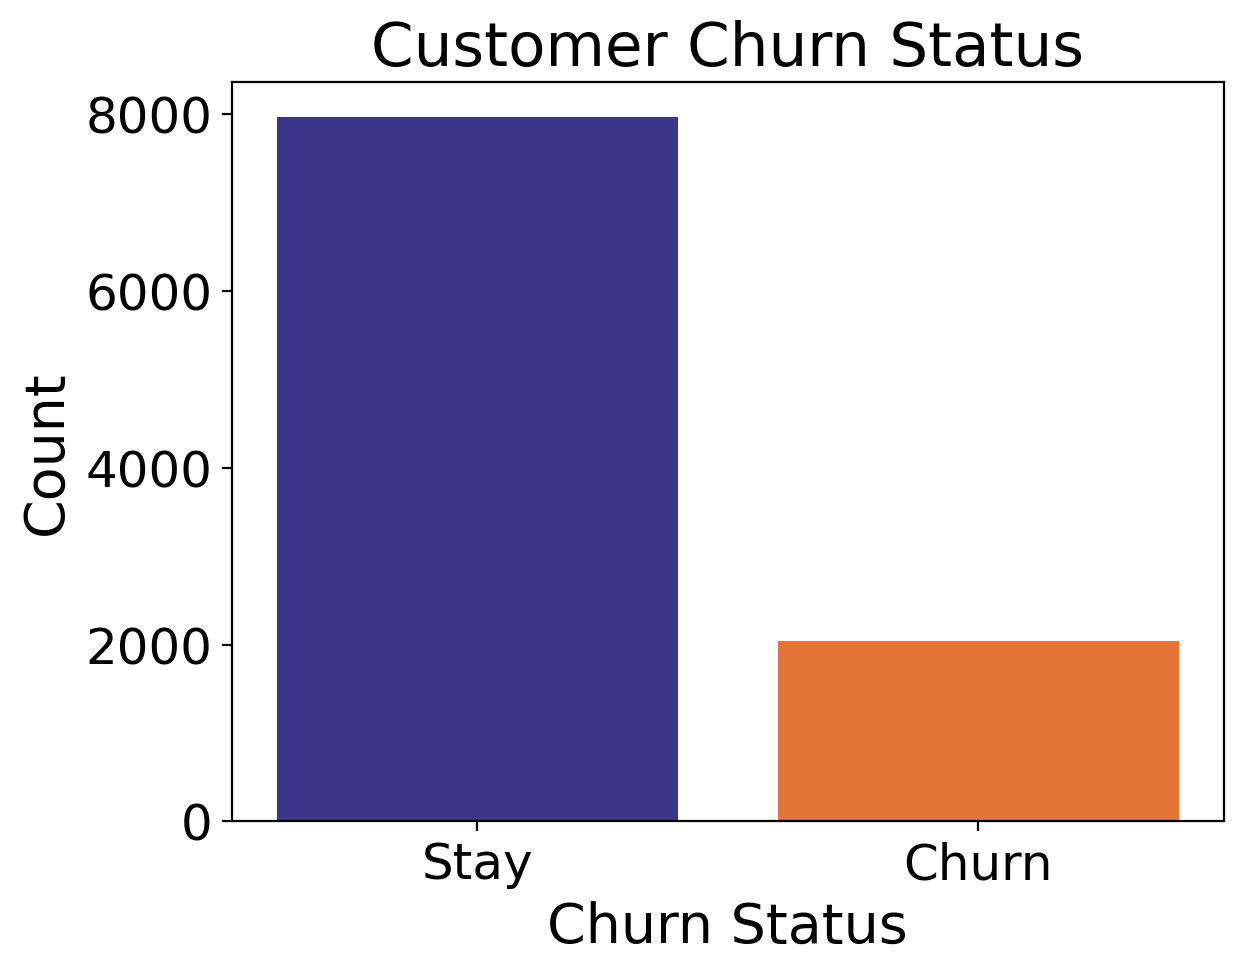

In [ ]:
exited = bankData['Exited']
stay = exited[exited == 0].count()
churn = exited[exited == 1].count()
labels = ['Stay', 'Churn']
values = [stay, churn]
colors=['#3b3689','#e57438']
label = '{}%'.format(round((value / bankData['Exited'].shape[0]) * 100, 2))
plt.bar(x=labels,height=values,color=colors)
plt.title('Customer Churn Status')
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.show()

## Feature attributes

In [ ]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

### Age

In [ ]:
def plot_continuous(feature):

    df_func = bankData.copy()
    df_func['Exited'] = df_func['Exited'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})
    for df,color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color='#3b3689',
                     alpha=0.66,
                     edgecolor='#e57438',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])

    plt.tight_layout();


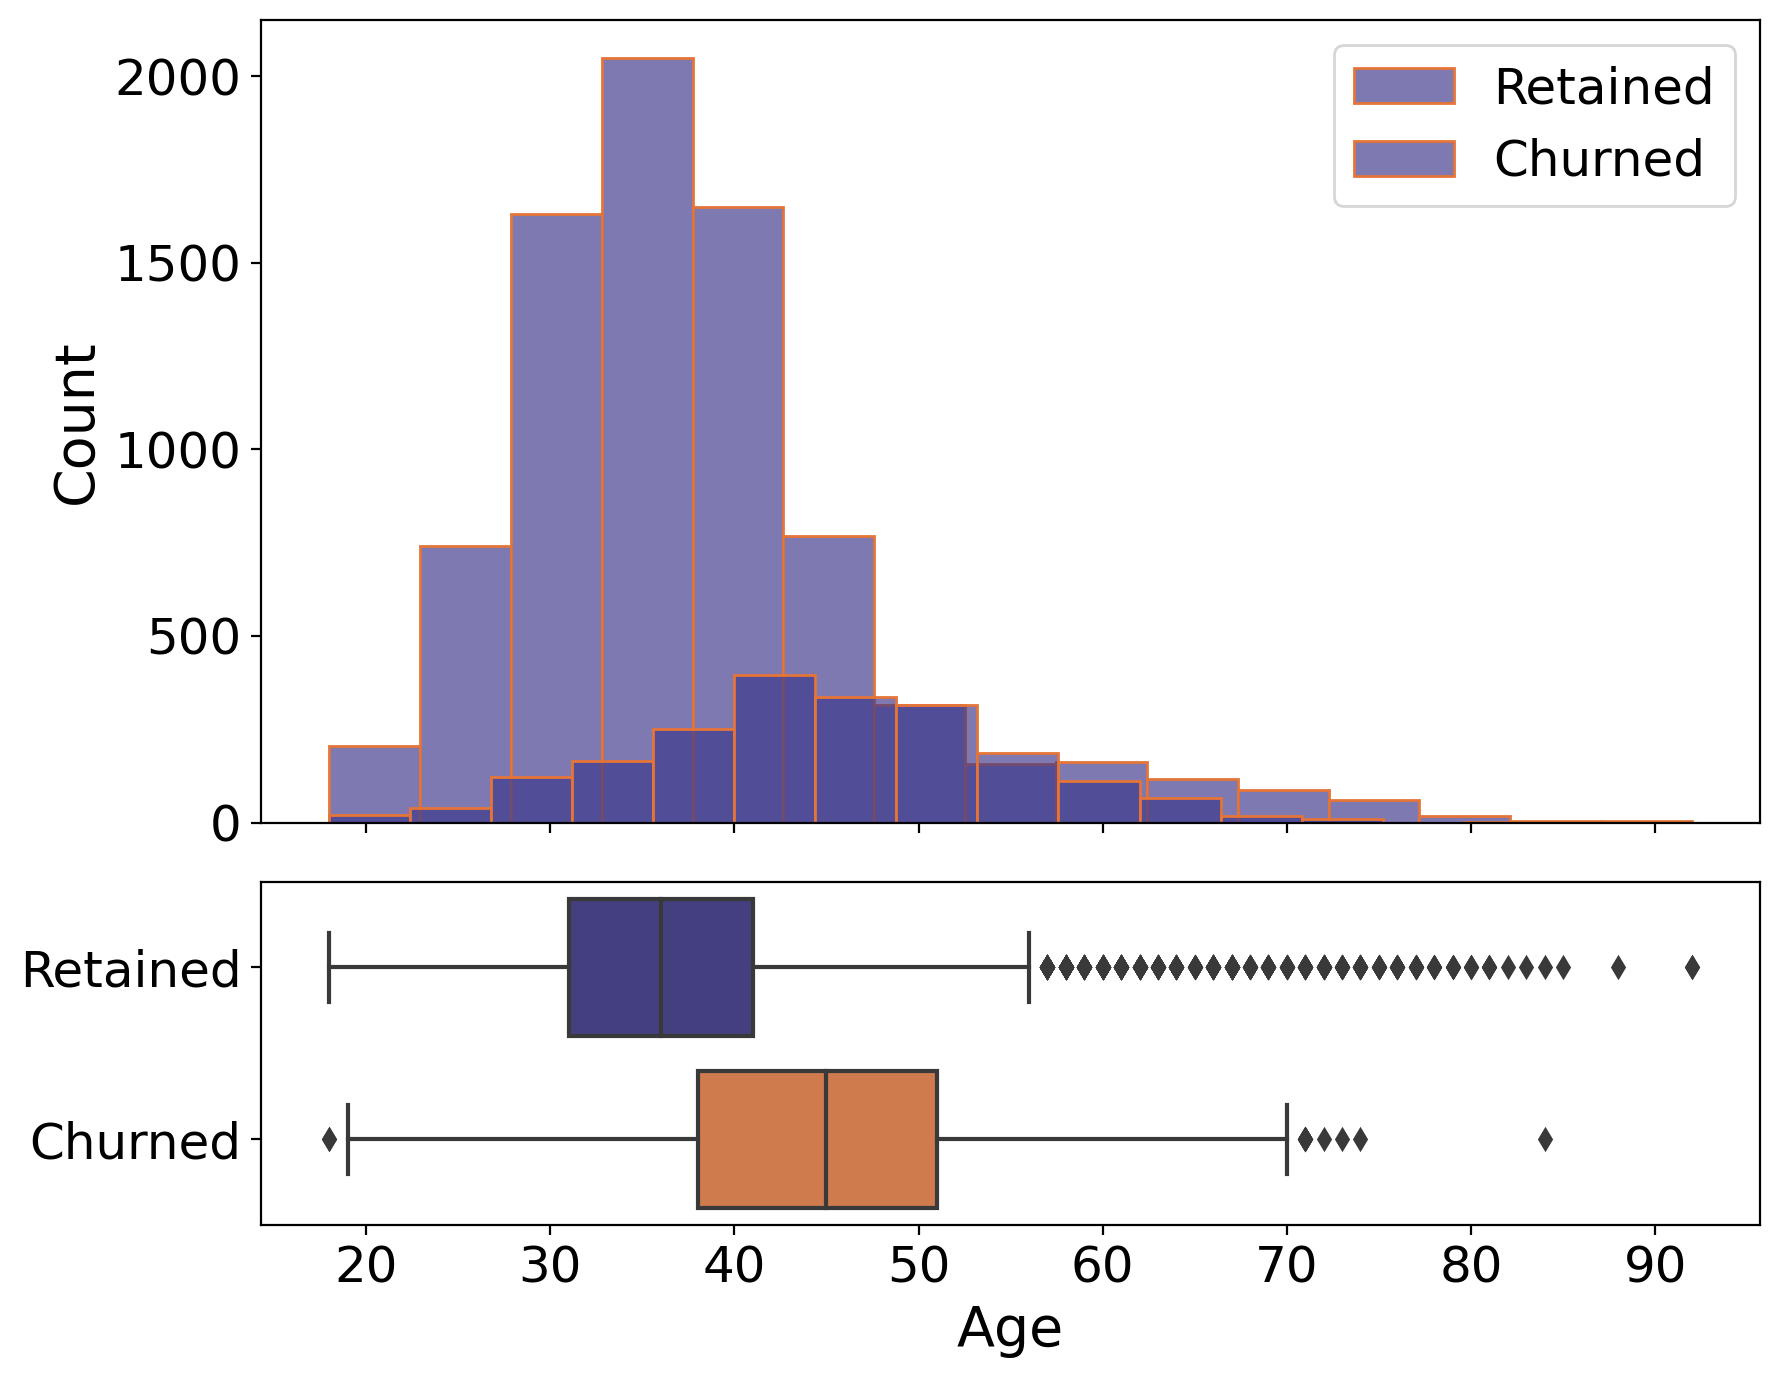

In [ ]:
df_churned = bankData[bankData['Exited'] == 1]
df_retained = bankData[bankData['Exited'] == 0]

plot_continuous('Age')

### Credit Score

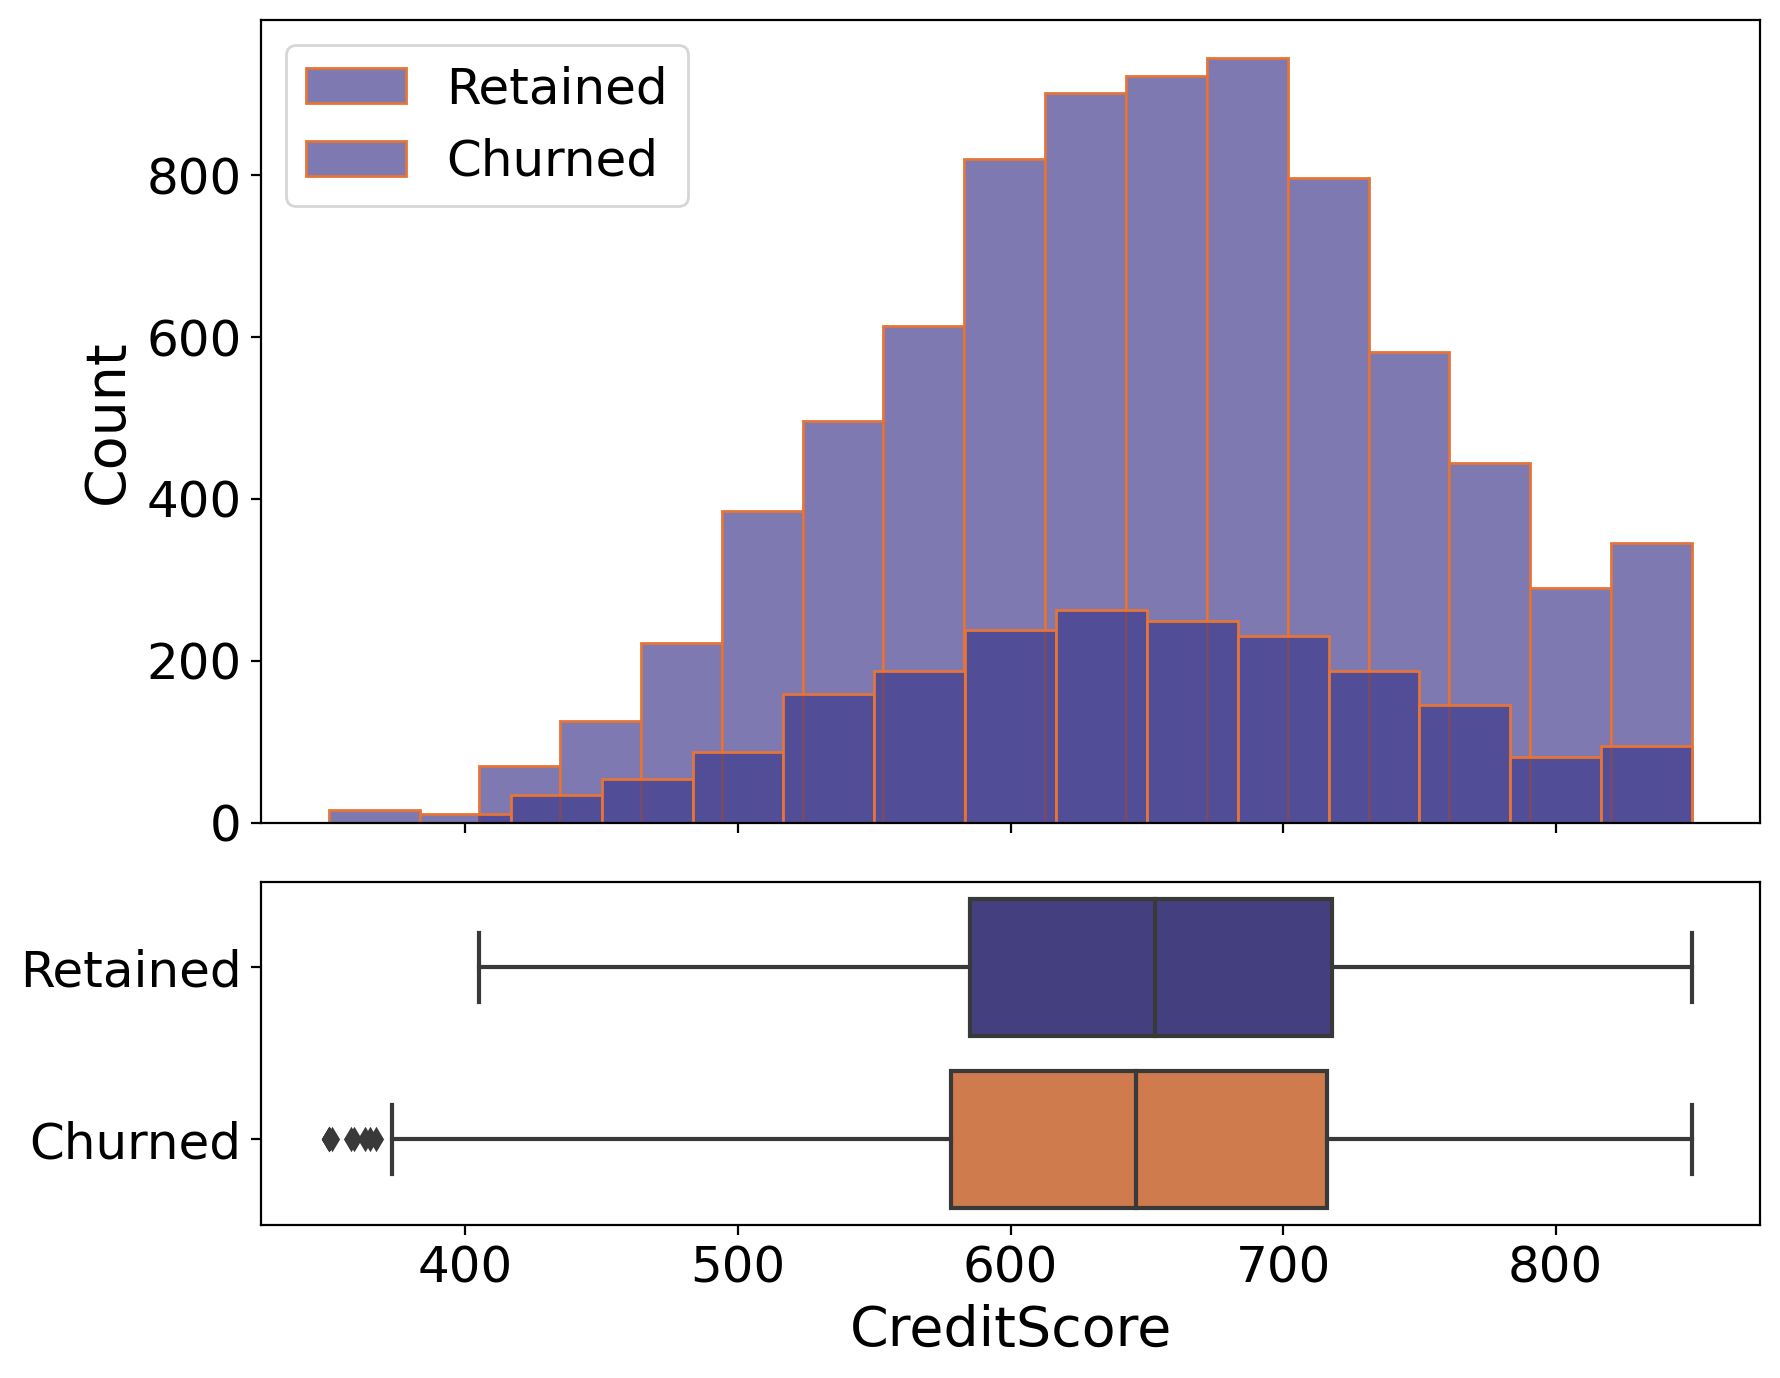

In [ ]:
plot_continuous('CreditScore')

### Balance

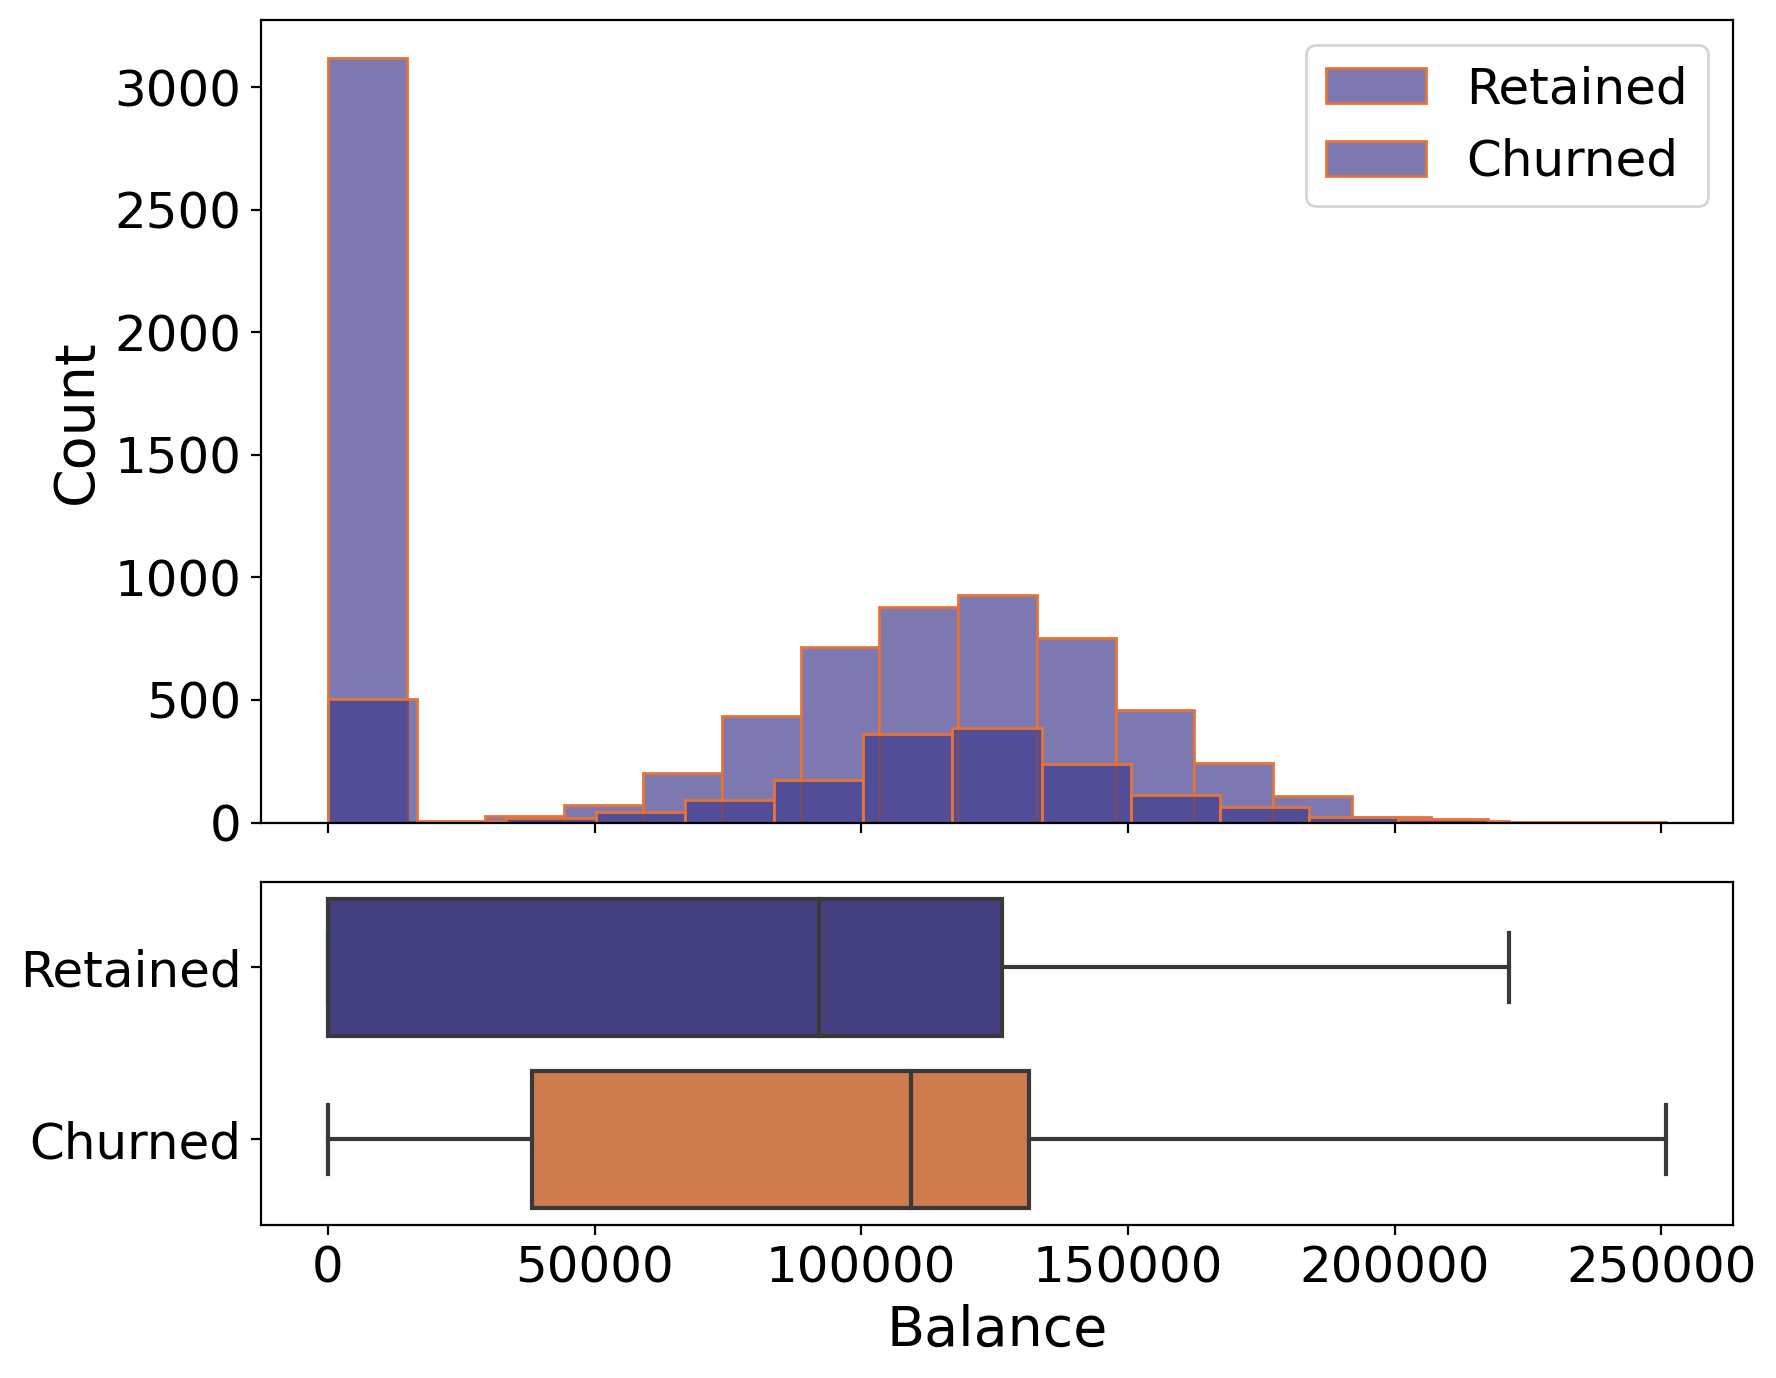

In [ ]:
plot_continuous('Balance')

### Estimated Salary

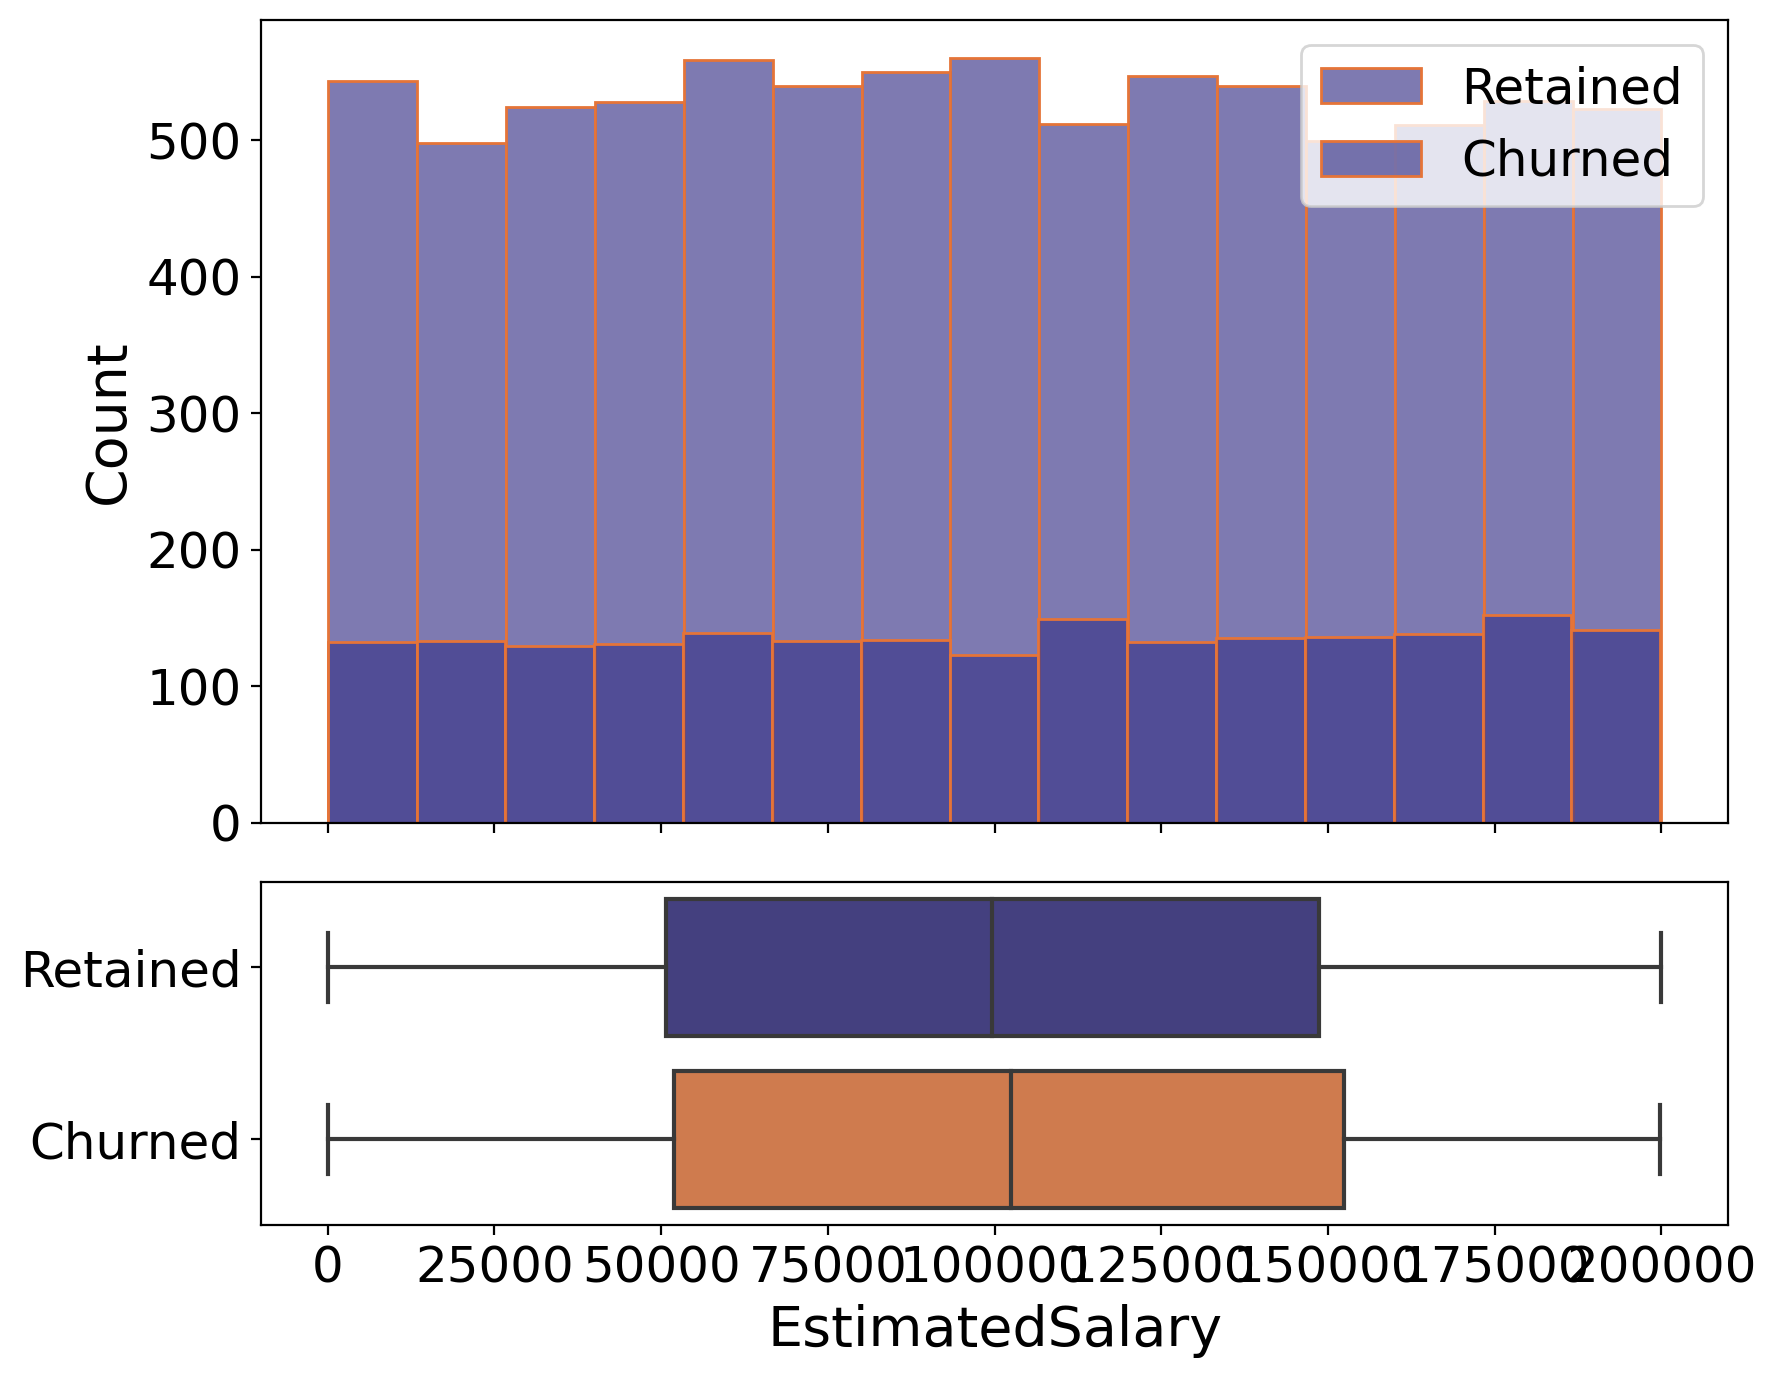

In [ ]:
plot_continuous('EstimatedSalary')

## Categorical Variables

In [ ]:
categorical= ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

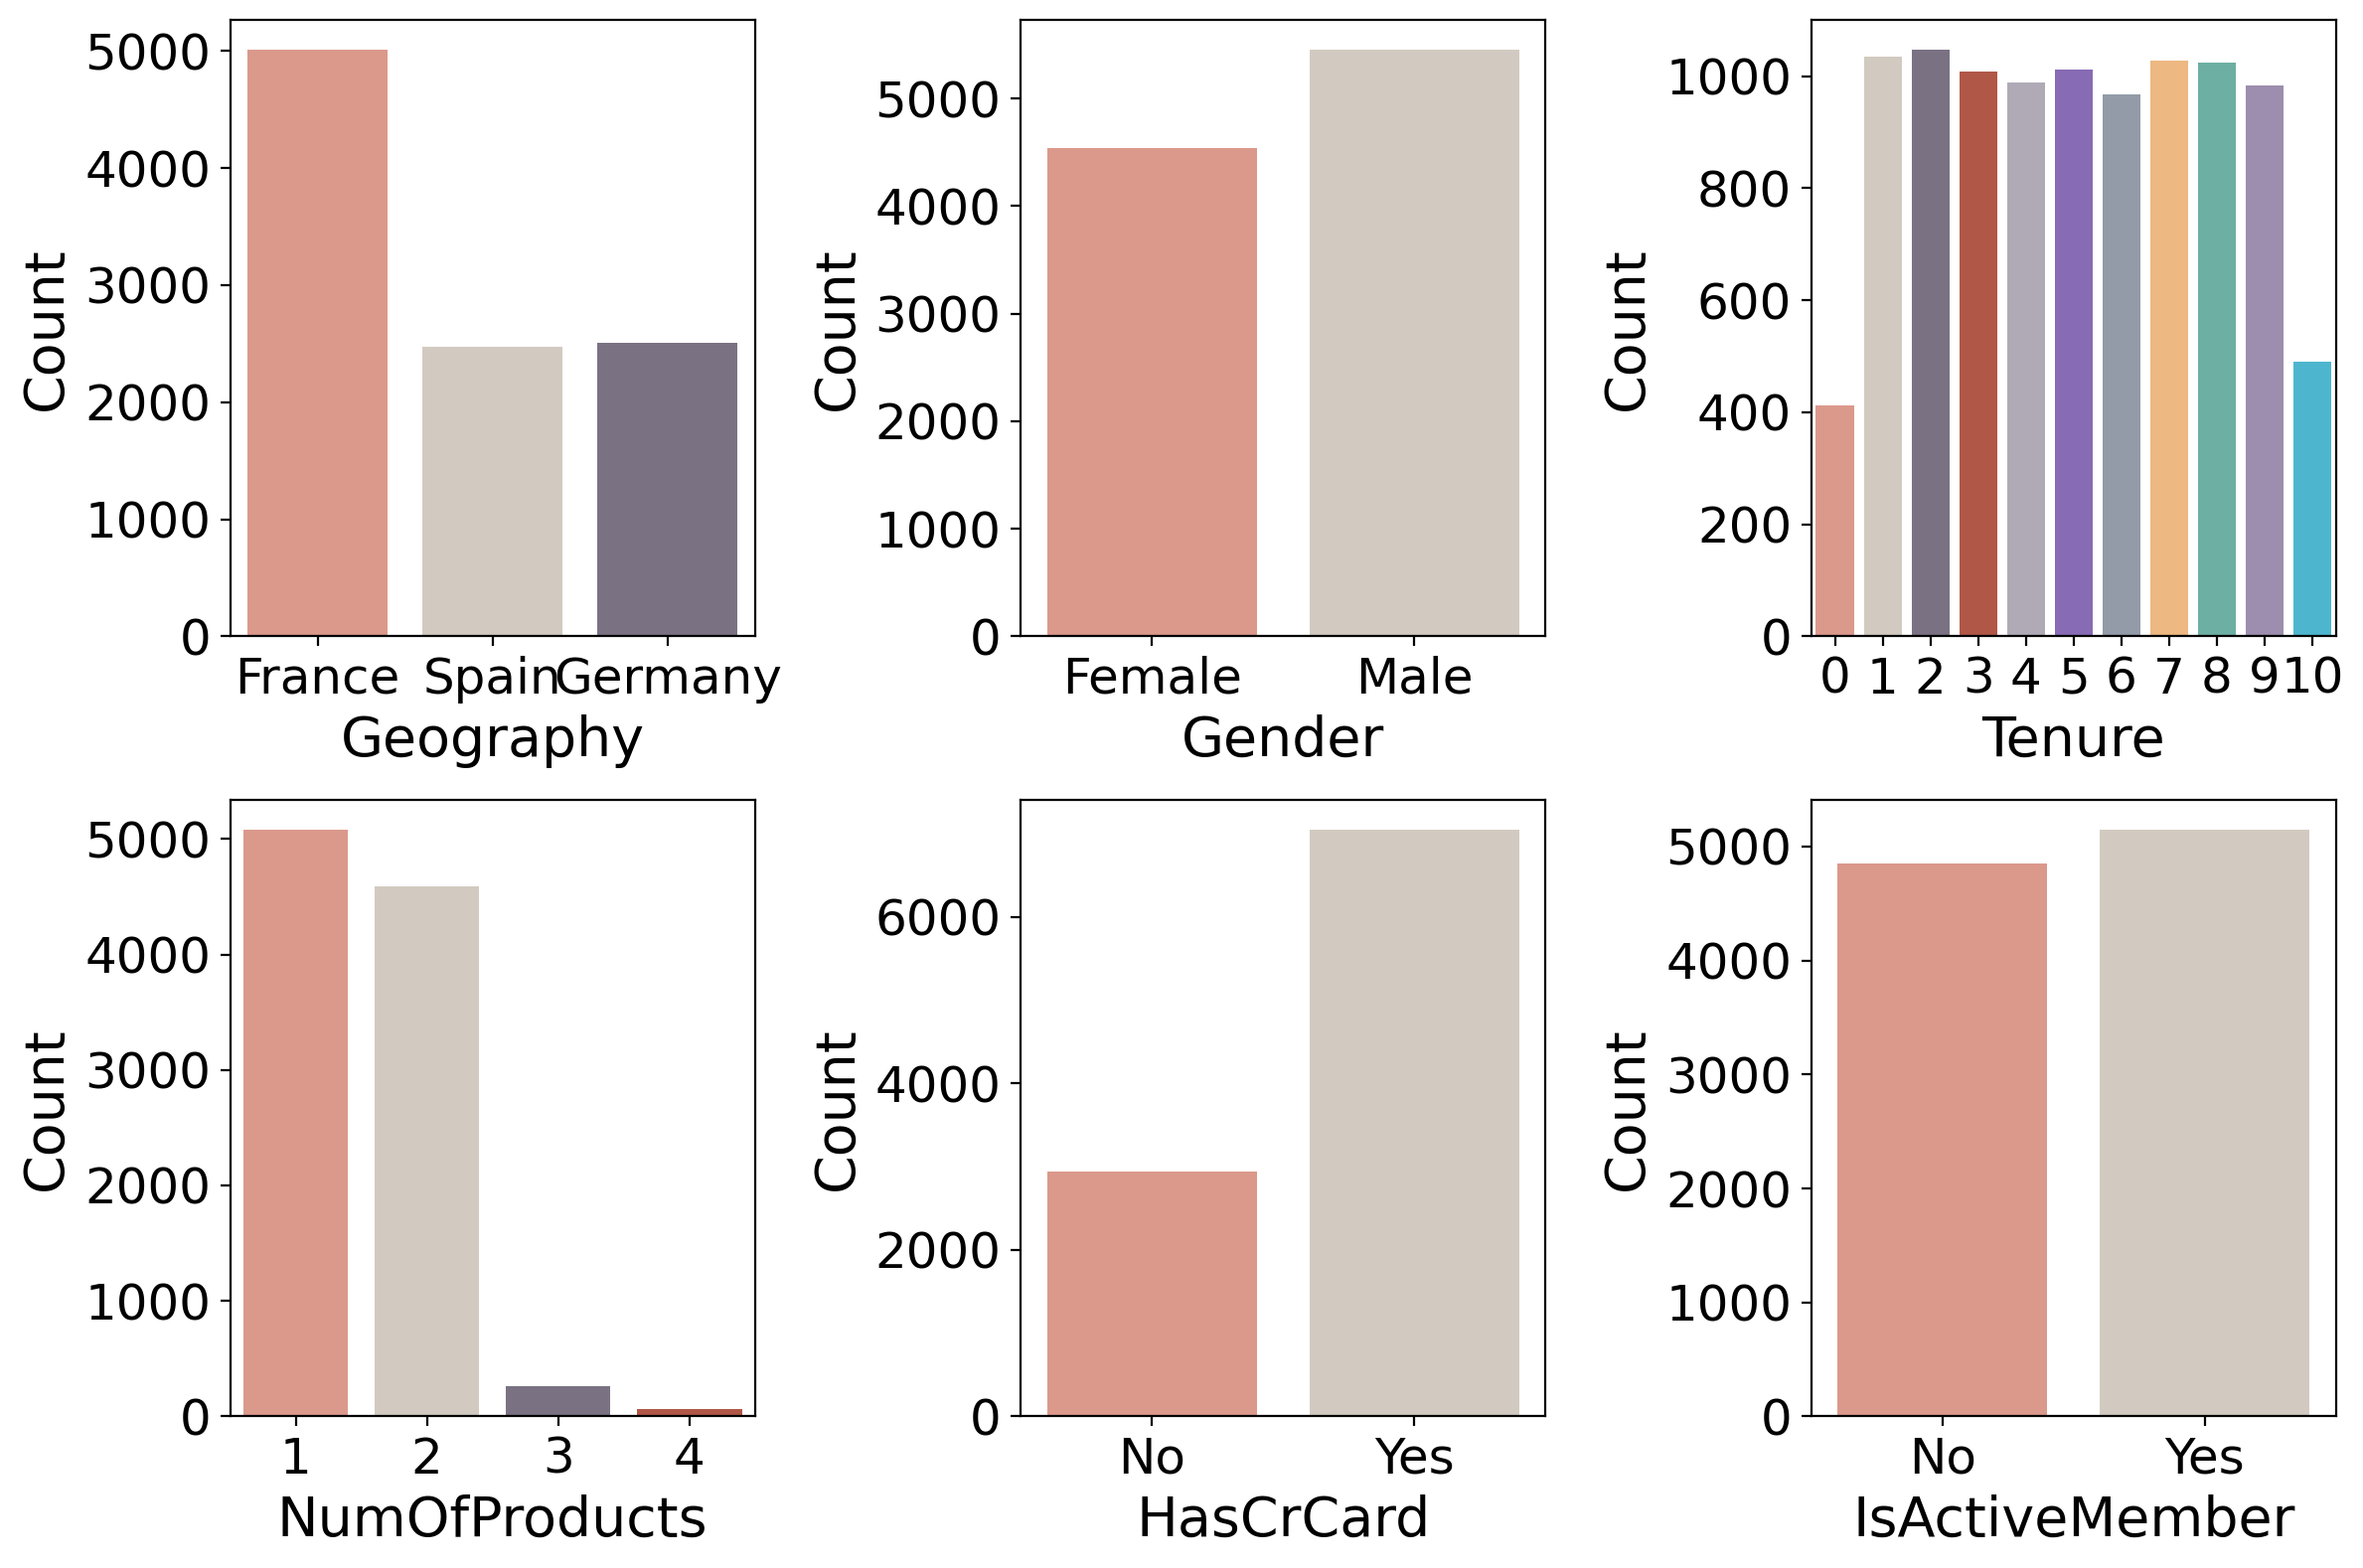

In [ ]:
df_cat = bankData[categorical]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 3, index + 1)
    sns.countplot(x=column, data=bankData, palette=colors_cat)

    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

### Geography

In [ ]:
def plot_categorical(feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(x=feature,
                  hue='Exited',
                  data=bankData,
                  palette=colors,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])
    ax1.set_ylim([0, 10000]);

    sns.barplot(x=feature,
                y='Exited',
                data=bankData,
                palette=colors_cat,
                ax=ax2)
    ax2.set_ylabel('Churn rate')

    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticklabels(['No', 'Yes'])

    plt.tight_layout()


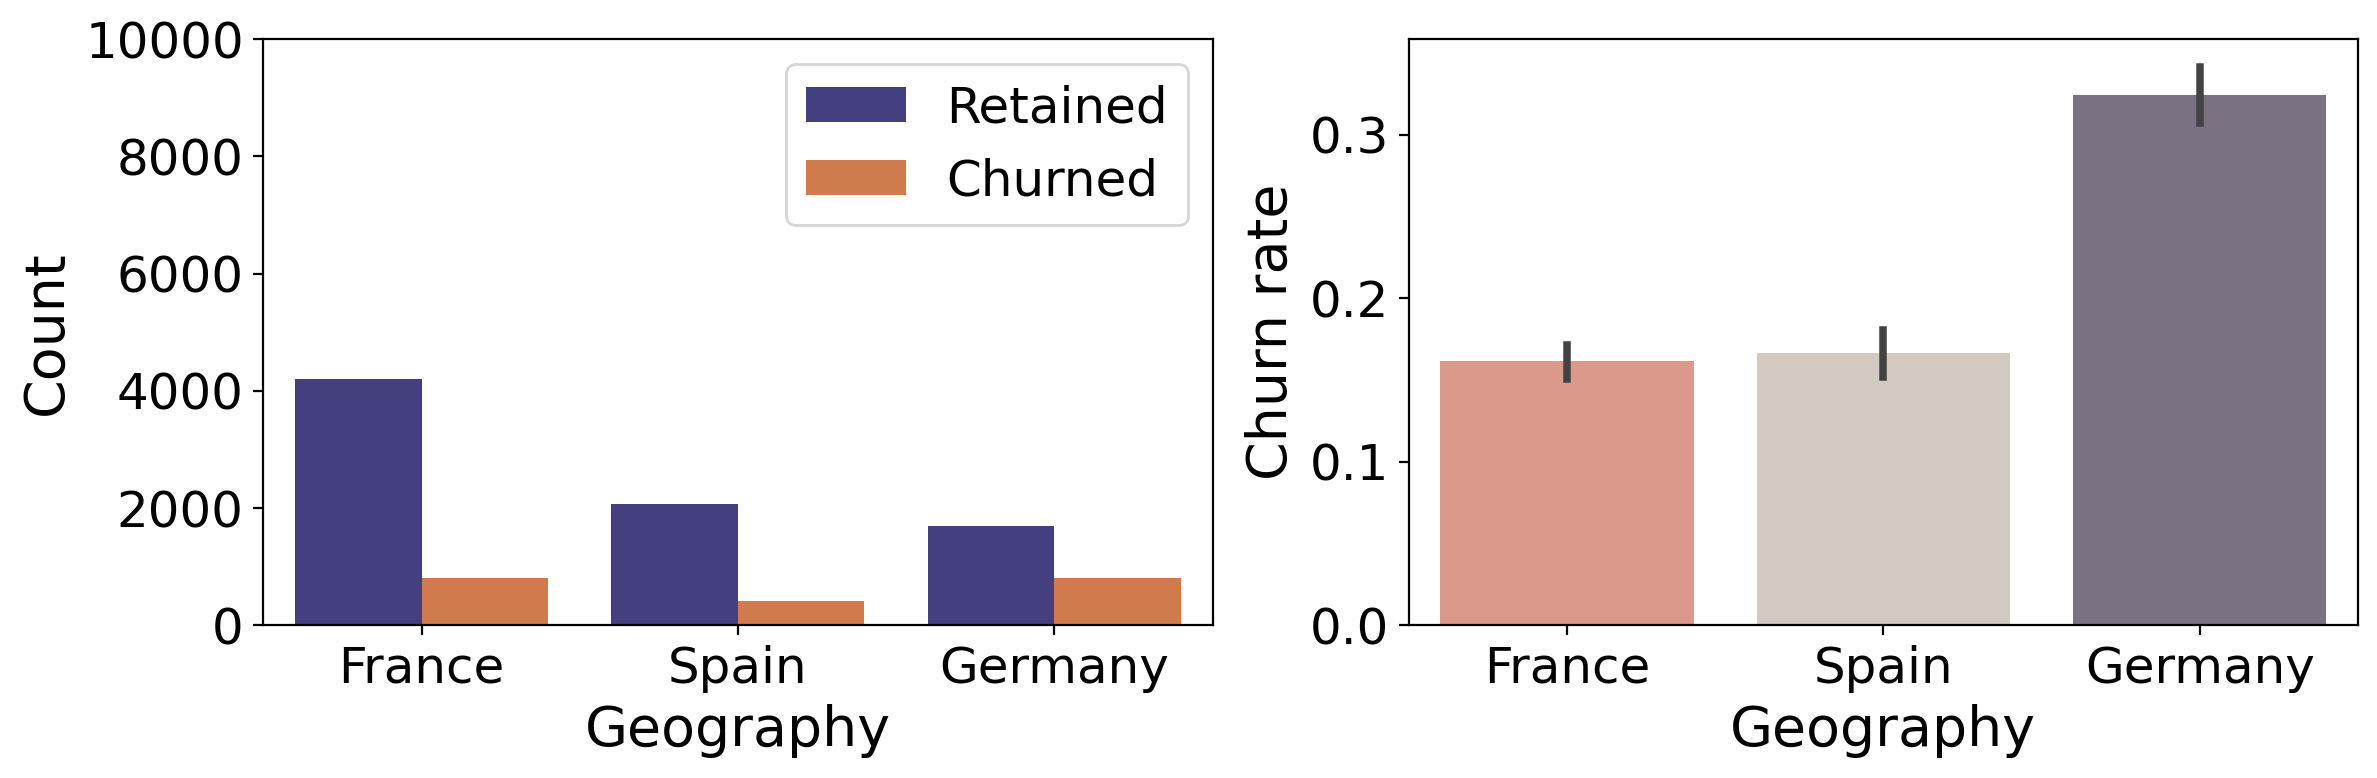

In [ ]:
plot_categorical('Geography')

### Gender

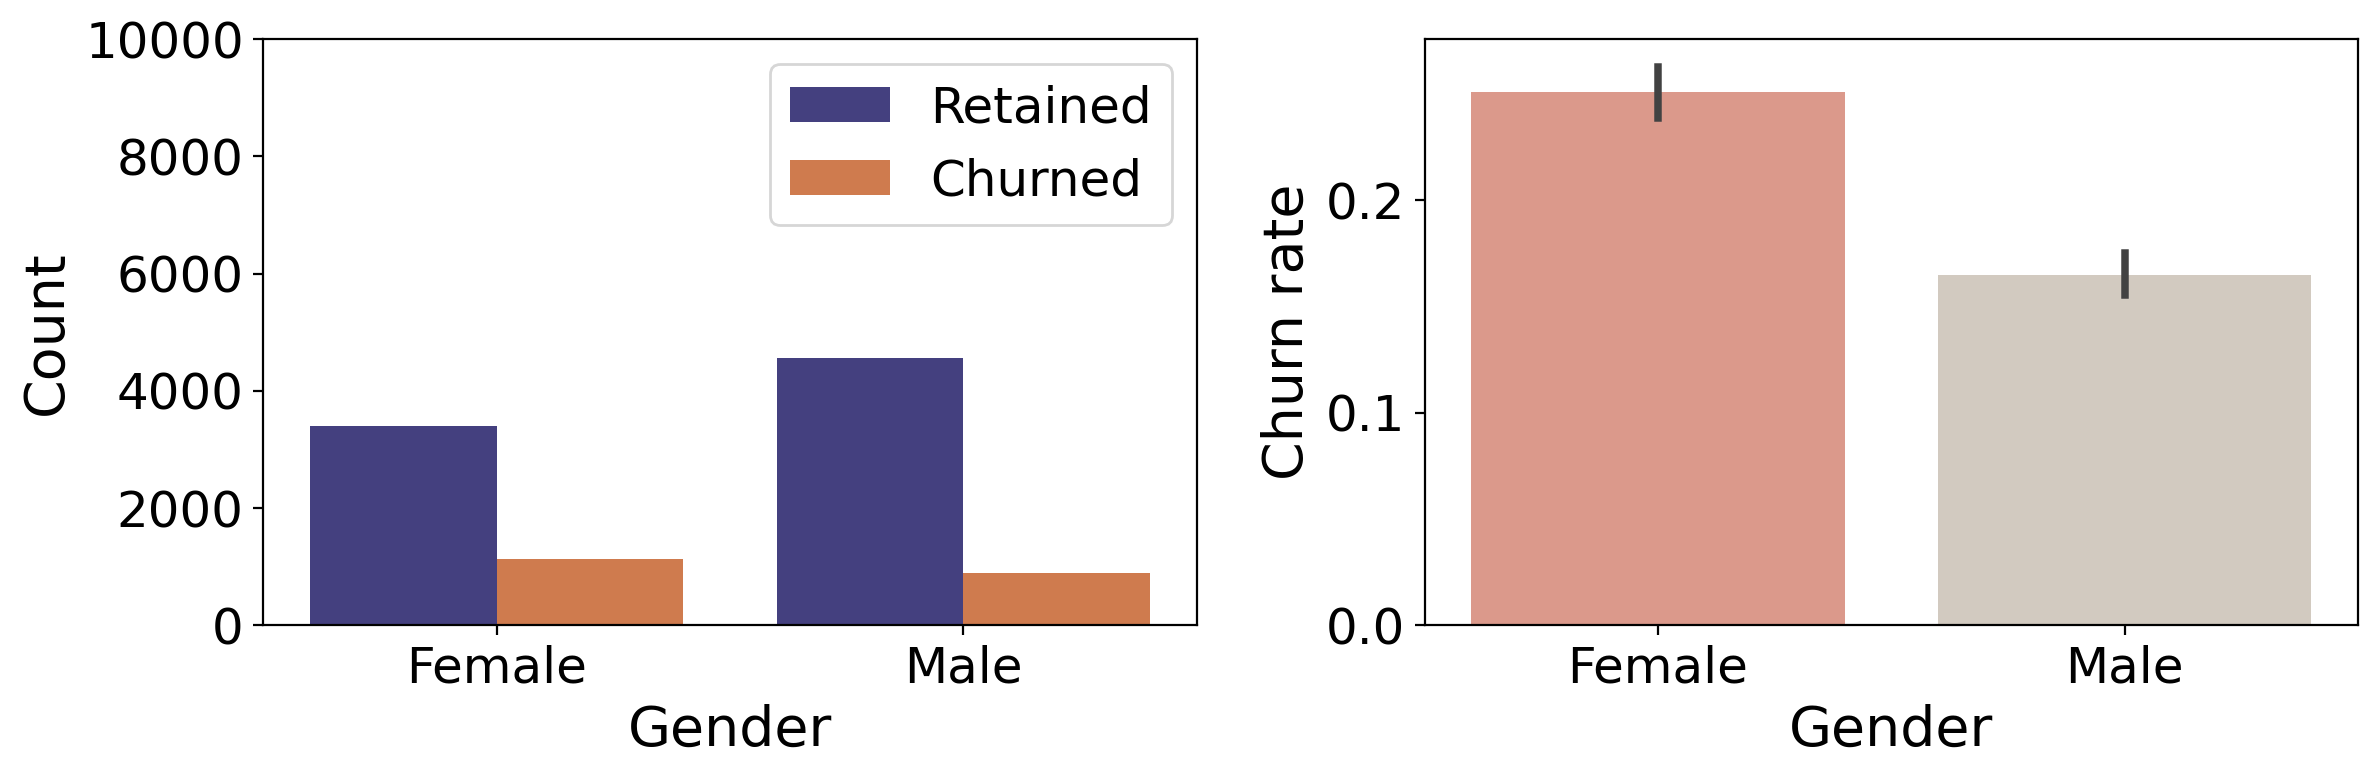

In [ ]:
plot_categorical('Gender')

### Tenure

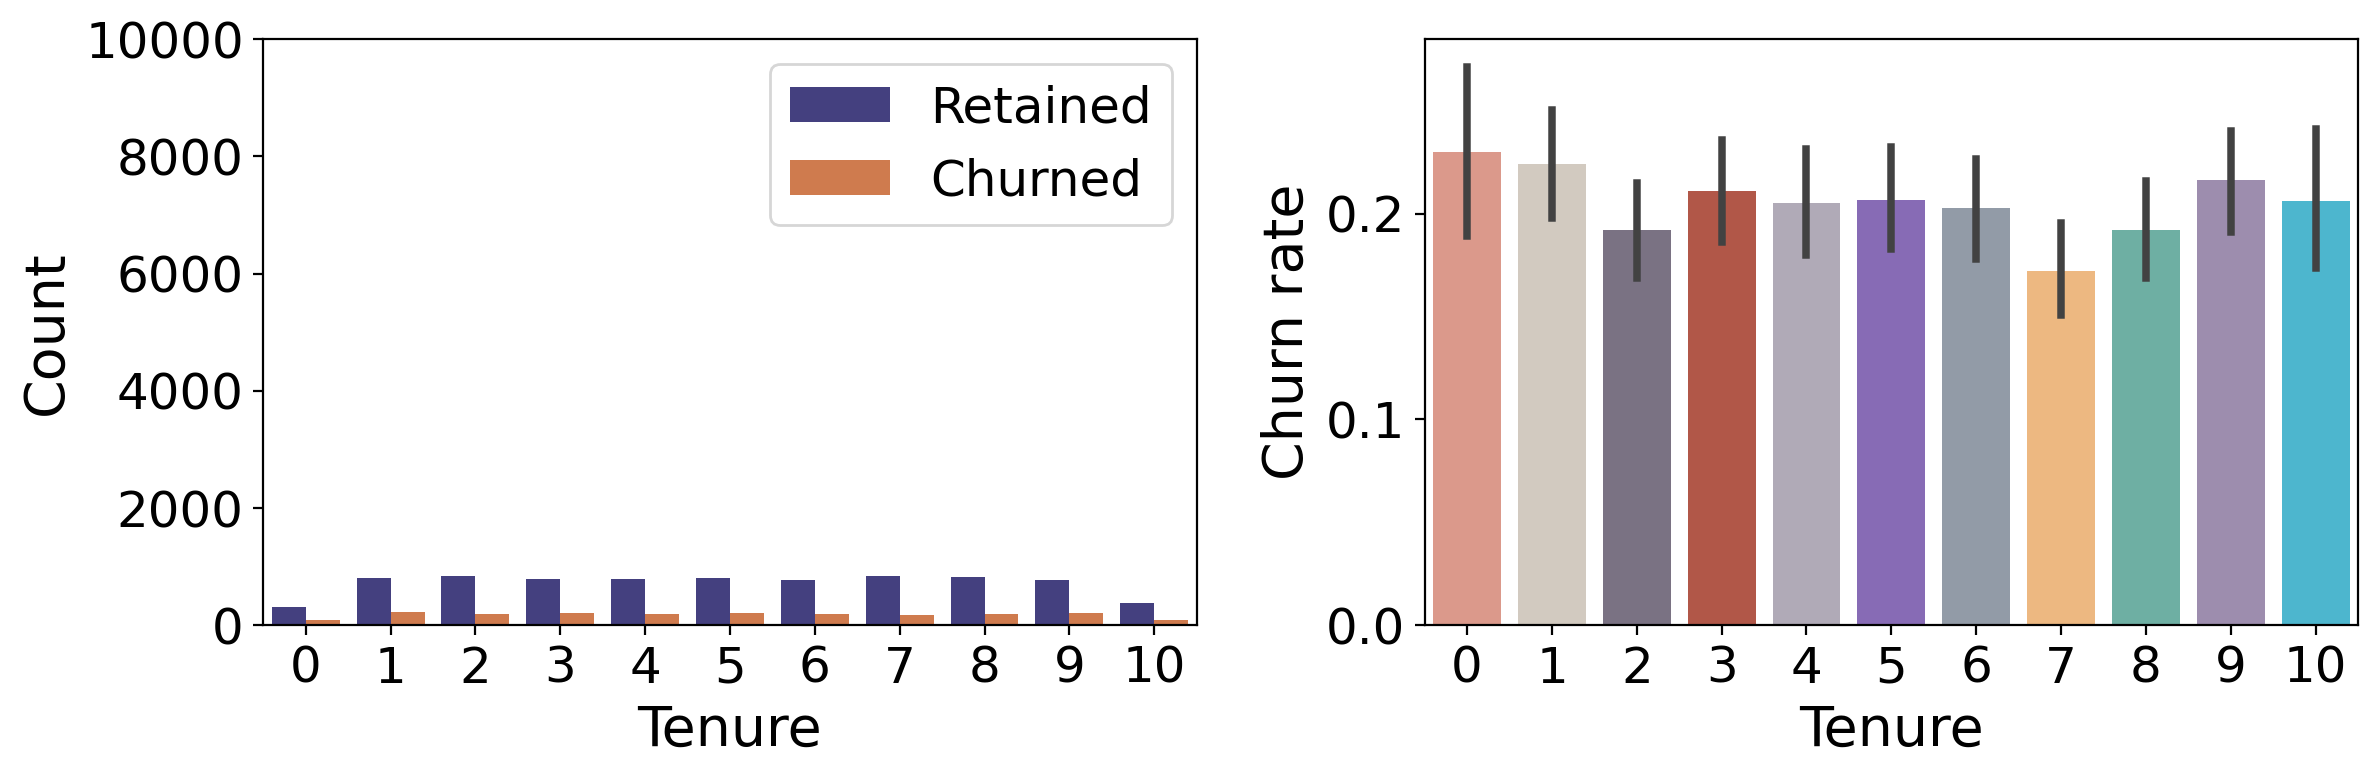

In [ ]:
plot_categorical('Tenure')

### Number of Product

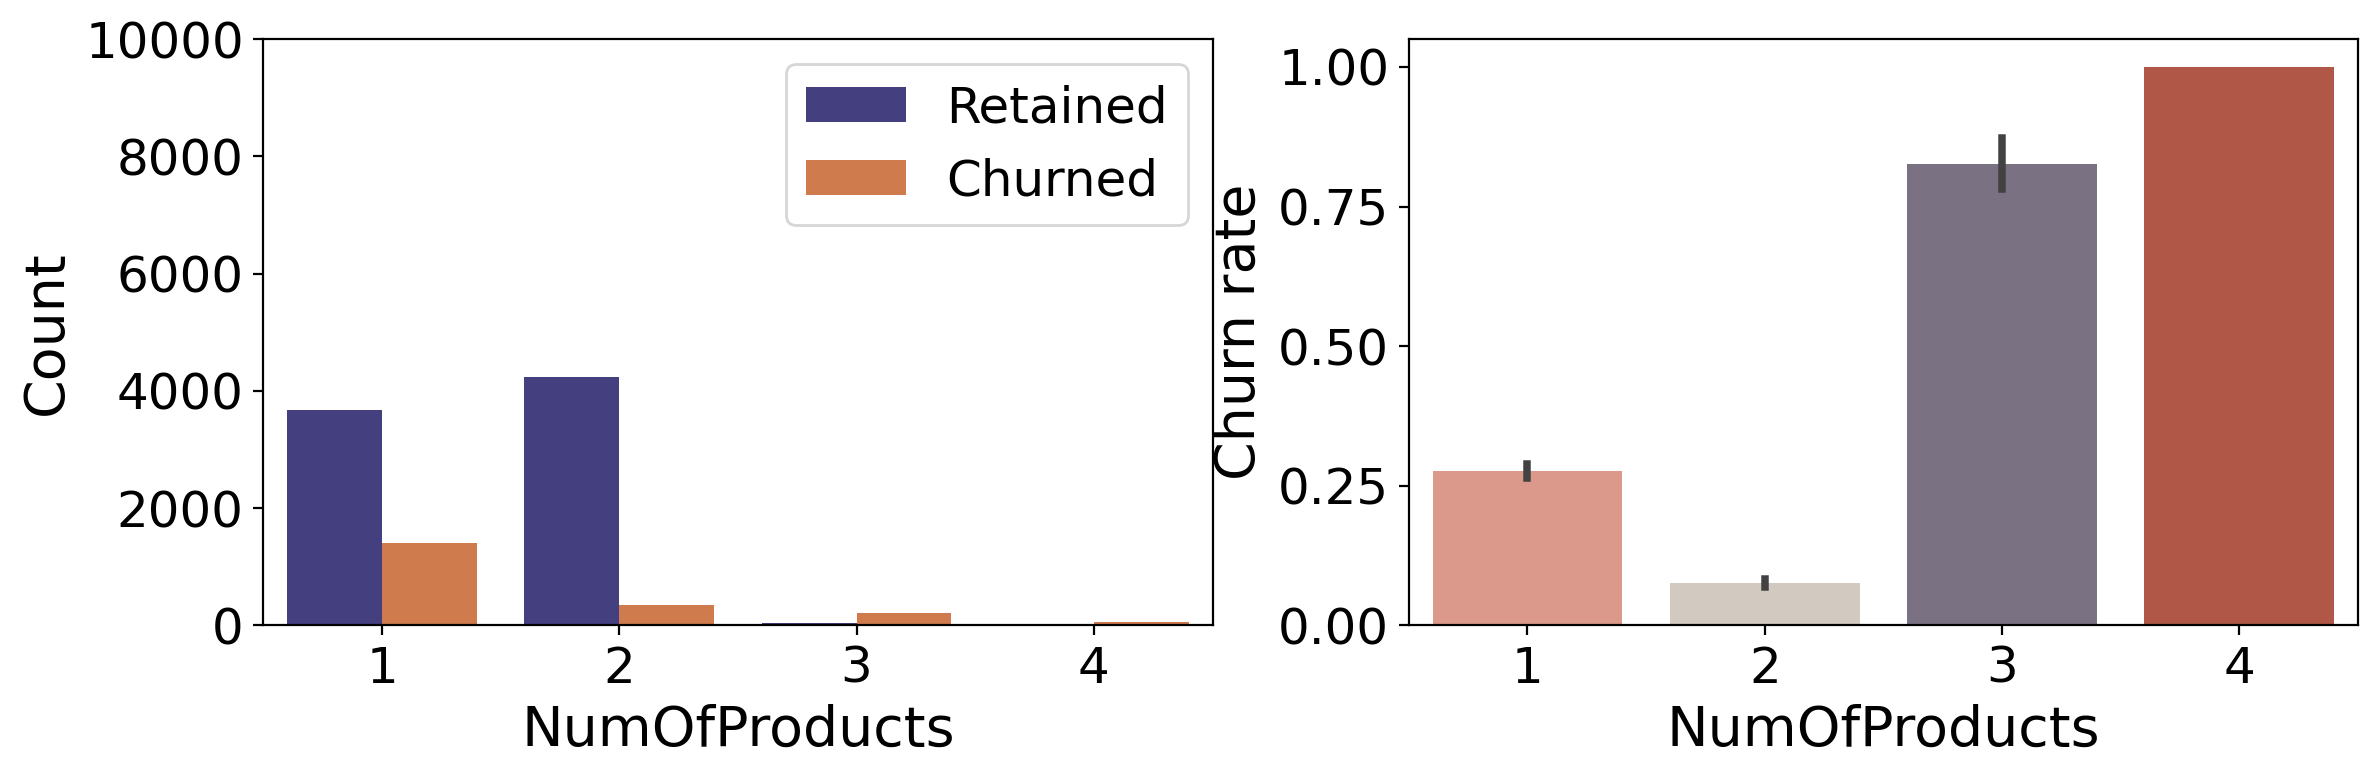

In [ ]:
plot_categorical('NumOfProducts')

### Card Holders

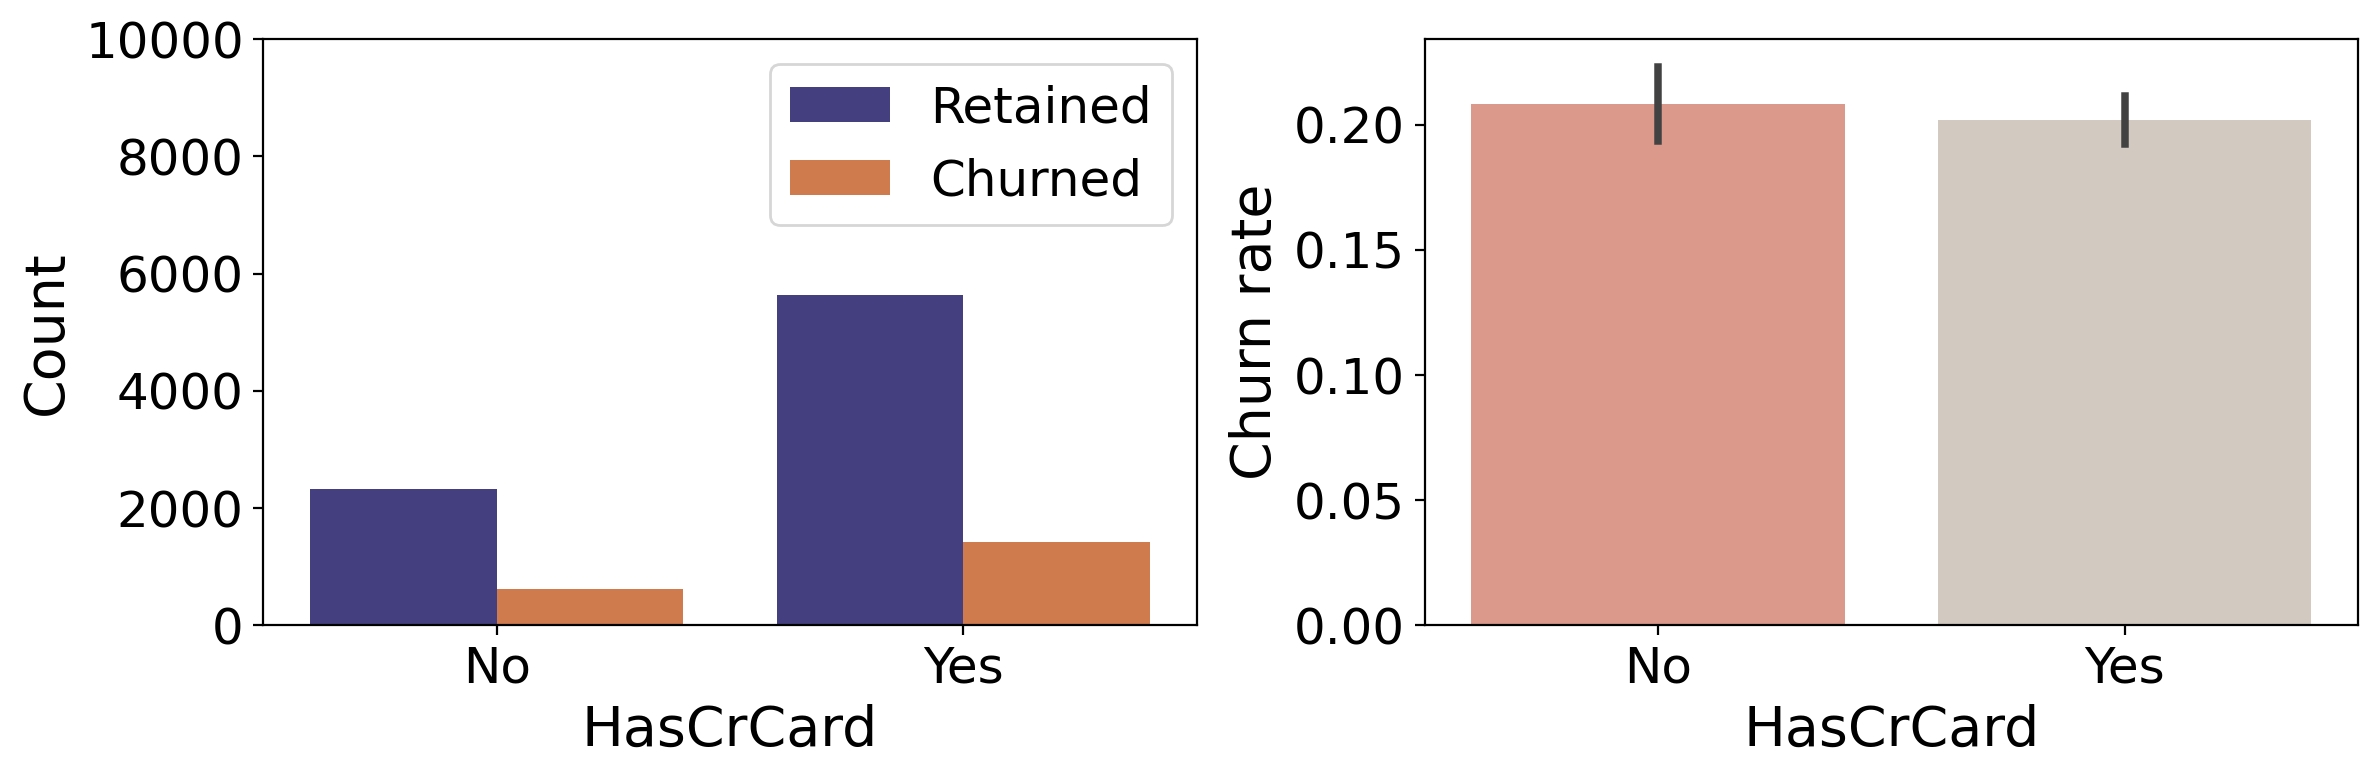

In [ ]:
plot_categorical('HasCrCard')

### Active Members

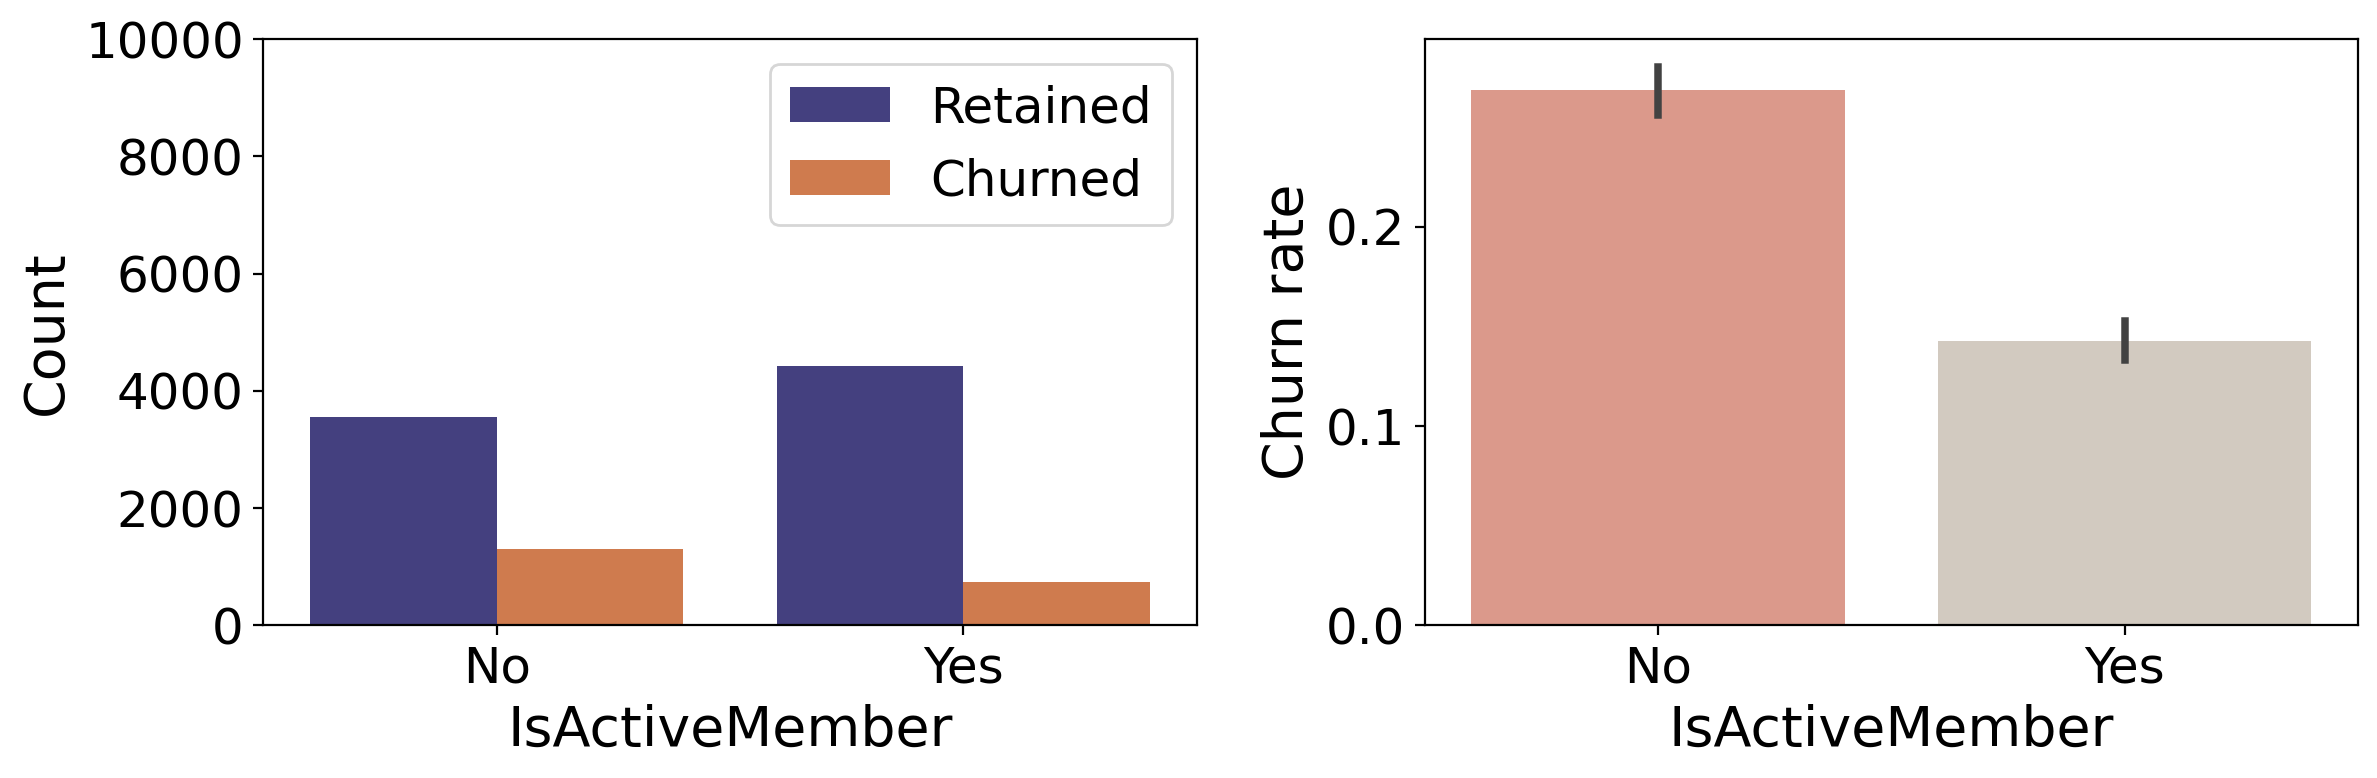

In [ ]:
plot_categorical('IsActiveMember')

## Correlations analysis


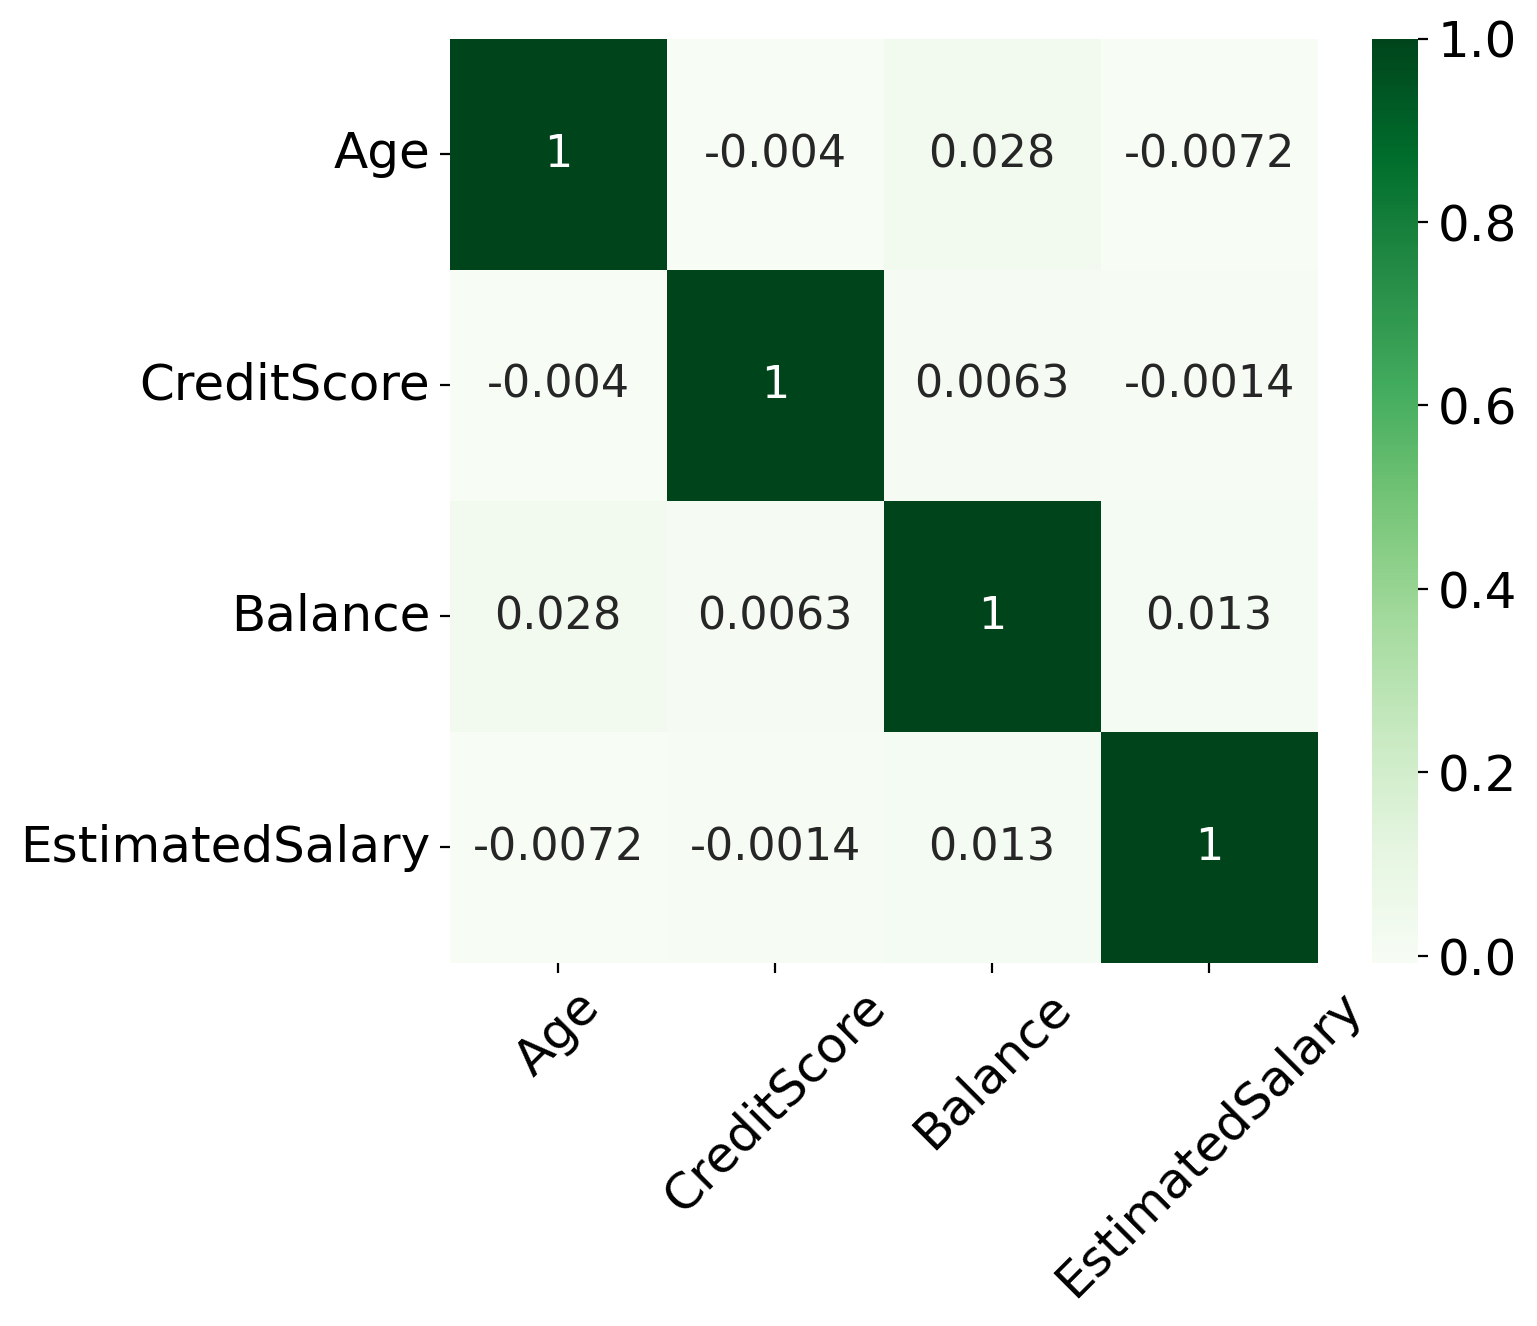

In [ ]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(bankData[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Greens',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360)

# Data Pre-processing

## Feature Selection

In [ ]:
features_drop = ['Tenure', 'HasCrCard', 'EstimatedSalary']
bankData = bankData.drop(features_drop, axis=1)

print('✔️ Features Dropped!')

✔️ Features Dropped!


## Encoding Categorical Features

In [ ]:
bankData['Gender'] = LabelEncoder().fit_transform(bankData['Gender'])

bankData['Geography'] = bankData['Geography'].map({
    'Germany': 1,
    'Spain': 0,
    'France': 0
})

print('✔️ Features Encoded!')

✔️ Features Encoded!


## Scaler

In [ ]:
scaler = StandardScaler()

scl_columns = ['CreditScore', 'Age', 'Balance']
bankData[scl_columns] = scaler.fit_transform(bankData[scl_columns])

print('✔️ Features Scaled!')

✔️ Features Scaled!


In [ ]:
y = bankData['Exited']
X = bankData.drop('Exited', 1)

print('✔️ Sets Created!')

✔️ Sets Created!


## Addressing Class Imbalance

In [ ]:
over = SMOTE(sampling_strategy='auto', random_state=random_state)
X, y = over.fit_resample(X, y)

y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Export Data

In [ ]:
bankData.to_csv('bankData.csv', index=False)

# Compare with other algorithms

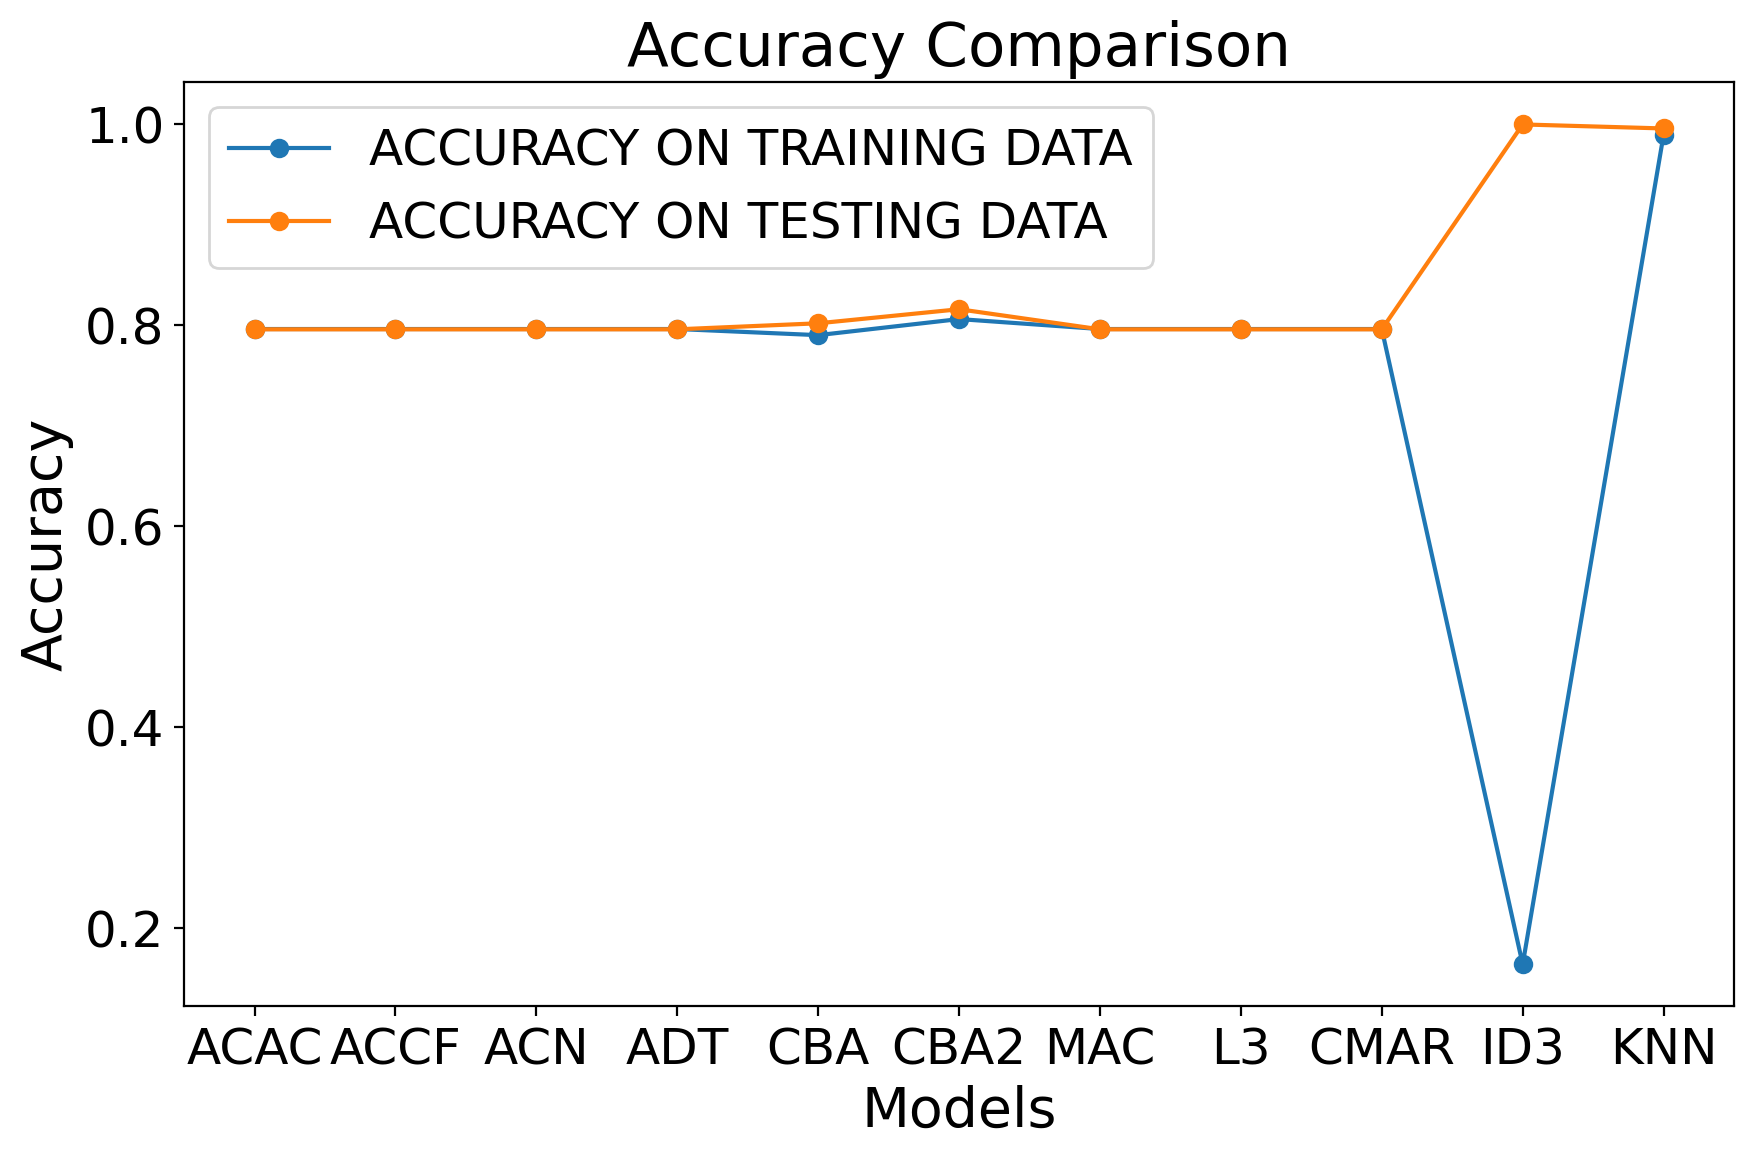

In [75]:
# Đường dẫn đến hai file txt
file_path1 = "/content/drive/MyDrive/HK7/Data/outputOnTraining.txt"
file_path2 = "/content/drive/MyDrive/HK7/Data/outputOnTesting.txt"

# Đọc dữ liệu từ file 1
with open(file_path1, 'r') as file1:
    lines1 = file1.readlines()

# Đọc dữ liệu từ file 2
with open(file_path2, 'r') as file2:
    lines2 = file2.readlines()

# Xử lý dữ liệu
accuracy_values1 = []
accuracy_values2 = []

for line1, line2 in zip(lines1, lines2):
    if line1.startswith("#ACCURACY:") and line2.startswith("#ACCURACY:"):
        values1 = line1.strip().split()[1:]
        values2 = line2.strip().split()[1:]
        accuracy_values1 = [float(value) for value in values1]
        accuracy_values2 = [float(value) for value in values2]
        break

# Tạo danh sách chỉ số của các mô hình
models = ["ACAC", "ACCF", "ACN", "ADT", "CBA", "CBA2", "MAC", "L3", "CMAR", "ID3", "KNN"]

plt.figure(figsize=(10, 6))
# Vẽ biểu đồ kết hợp
plt.plot(models, accuracy_values1, marker='o', label='ACCURACY ON TRAINING DATA')
plt.plot(models, accuracy_values2, marker='o', label='ACCURACY ON TESTING DATA')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Đặt tiêu đề cho đồ thị
plt.title('Accuracy Comparison')

# Hiển thị chú thích
plt.legend()
plt.show()